# 🎯 GAN 학습 전 필수 선행지식 복습 (4시간 과정)

**학습 목표**
- GAN을 이해하기 위한 필수 딥러닝 개념 복습
- TensorFlow 코드로 직접 구현하며 체득
- 객관식, 서술형, 코드 실습을 통한 완벽 이해

**과정 구성**
1. 신경망 기본 개념 (30분)
2. Loss & Optimizer (30분)
3. CNN 기초 (30분)
4. Transposed Convolution (30분)
5. 이미지 전처리 & tf.data (30분)
6. 확률 분포 기초 (20분)
7. Activation Functions (20분)
8. Custom Training Loop (40분)

**총 소요 시간: 약 4시간**

## 📌 환경 설정 (한글 폰트 적용)

In [ ]:
# Colab용 한글 폰트 설치 및 설정 (한 번만 실행)
import os
import subprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import tensorflow as tf
import numpy as np

# NanumGothic 설치 및 폰트 캐시 갱신
if not os.path.exists('/usr/share/fonts/truetype/nanum/NanumGothic.ttf'):
    subprocess.check_call(['apt-get', '-qq', '-y', 'install', 'fonts-nanum'])
    subprocess.check_call(['fc-cache', '-fv'])

# matplotlib에 폰트 등록
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rcParams['axes.unicode_minus'] = False
else:
    print("NanumGothic 폰트를 찾을 수 없습니다. 설치가 정상적으로 되었는지 확인하세요.")

print(f"TensorFlow 버전: {tf.__version__}")
print("✅ 한글 폰트 설정 완료")

TensorFlow 버전: 2.19.0
✅ 한글 폰트 설정 완료


---
# 1️⃣ 신경망 기본 개념 (30분)

## 📚 핵심 개념
- **Perceptron**: 가장 기본적인 신경망 단위
- **MLP (Multi-Layer Perceptron)**: 여러 층의 뉴런으로 구성
- **Forward Propagation**: 입력 → 출력 방향 계산
- **Backpropagation**: 손실을 줄이는 방향으로 가중치 업데이트

### 📝 문제 1-1: 객관식 (기본 개념)

**Q1. 신경망에서 하나의 뉴런이 수행하는 연산 순서로 옳은 것은?**

1. 활성화 함수 → 가중합 → 출력
2. 가중합 → 활성화 함수 → 출력
3. 입력 → 출력 → 활성화 함수
4. 활성화 함수 → 입력 → 가중합

<details>
<summary>💡 힌트 보기</summary>

뉴런은 먼저 입력값과 가중치를 곱한 후 더하고(가중합), 그 결과에 활성화 함수를 적용합니다.
</details>

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

![img](https://wikidocs.net/images/page/164491/%E1%84%91%E1%85%A5%E1%84%89%E1%85%A6%E1%86%B8%E1%84%90%E1%85%B3%E1%84%85%E1%85%A9%E1%86%AB.png)

뉴런의 연산 순서:
1. 가중합(Weighted Sum): z = w₁x₁ + w₂x₂ + ... + b
2. 활성화 함수(Activation): a = f(z)
3. 출력(Output): 다음 층으로 전달
</details>

**Q2. Backpropagation에 대한 설명으로 틀린 것은?**

1. 손실 함수의 그래디언트를 계산한다
2. 출력층에서 입력층 방향으로 진행된다
3. 가중치를 랜덤하게 업데이트한다
4. Chain Rule을 사용한다

<details>
<summary>💡 힌트 보기</summary>

Backpropagation은 "손실을 줄이는 방향"으로 가중치를 체계적으로 업데이트합니다.
</details>

<details>
<summary>✅ 정답 확인</summary>

**정답: 3번**

Backpropagation은 그래디언트(기울기)를 따라 가중치를 업데이트하므로, 랜덤하게 업데이트하지 않습니다.
</details>

### ✍️ 문제 1-2: 서술형

**Q. Overfitting과 Underfitting의 차이를 설명하고, 각각의 경우 훈련 손실과 검증 손실의 관계를 서술하세요.**

<details>
<summary>💡 힌트 보기</summary>

- Overfitting: 모델이 훈련 데이터에 "과하게" 맞춰진 상태
- Underfitting: 모델이 데이터의 패턴을 "충분히 학습하지 못한" 상태
</details>

<details>
<summary>✅ 예시 답안</summary>

![img](https://wikidocs.net/images/page/152777/overfit.JPG)

**Overfitting (과적합)**
- 모델이 훈련 데이터에 지나치게 맞춰져서 새로운 데이터에 일반화되지 못하는 현상
- 훈련 손실은 매우 낮지만, 검증 손실은 높음
- 해결: Dropout, Early Stopping, 데이터 증강 등

**Underfitting (과소적합)**
- 모델이 데이터의 패턴을 충분히 학습하지 못한 상태
- 훈련 손실과 검증 손실 모두 높음
- 해결: 모델 복잡도 증가, 더 많은 학습 등
</details>

### 💻 실습 1-1: 간단한 Perceptron 구현

**목표**: TensorFlow로 단일 뉴런(Perceptron)을 직접 구현하고 동작 확인

In [ ]:
# 실습 1-1-1: 단일 뉴런의 Forward Pass 구현

# 입력 데이터 생성 (배치 크기 4, 특성 3개)
x = tf.constant([[1.0, 2.0, 3.0],
                 [2.0, 3.0, 4.0],
                 [3.0, 4.0, 5.0],
                 [4.0, 5.0, 6.0]])
x

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [2., 3., 4.],
       [3., 4., 5.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
# 가중치 초기화 (특성 3개, 출력 1개)
w = tf.Variable(tf.random.normal([3, 1], mean=0.0, stddev=1.0))
# 편향 초기화
b = tf.Variable(tf.zeros([1]))

w, b

(<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
 array([[-1.0173073 ],
        [-0.54807425],
        [-0.58964765]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

In [ ]:

print("입력 크기:", x.shape)  # (4, 3)
print("가중치 크기:", w.shape)  # (3, 1)
print("편향 크기:", b.shape)  # (1,)

# Forward Pass: y = xW + b
# tf.matmul: 행렬 곱셈 수행
z = tf.matmul(x, w) + b

print("\n가중합 결과 (z):")
print(z.numpy())  # (4, 1) 크기의 출력

# 활성화 함수 적용 (Sigmoid)
# Sigmoid: 0과 1 사이의 값으로 변환
a = tf.nn.sigmoid(z)

print("\n활성화 후 출력 (a):")
print(a.numpy())

입력 크기: (4, 3)
가중치 크기: (3, 1)
편향 크기: (1,)

가중합 결과 (z):
[[ -3.8823986]
 [ -6.037428 ]
 [ -8.192457 ]
 [-10.3474865]]

활성화 후 출력 (a):
[[2.0185502e-02]
 [2.3820051e-03]
 [2.7665653e-04]
 [3.2072276e-05]]


<details>
<summary>💡 코드 이해하기</summary>

- `tf.matmul(x, w)`: 입력과 가중치의 행렬 곱셈
- `+ b`: 편향(bias) 추가
- `tf.nn.sigmoid()`: 시그모이드 활성화 함수 (0~1 범위로 변환)
</details>

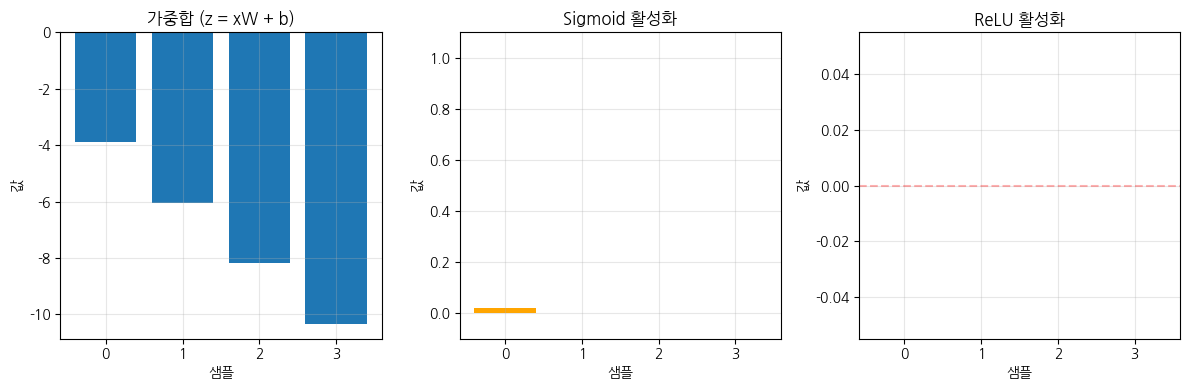

Sigmoid 범위: 3.2072276e-05 ~ 0.020185502
ReLU 범위: 0.0 ~ 0.0


In [ ]:
# 실습 1-1-2: ReLU 활성화 함수 비교

# ReLU 활성화 함수 적용
# ReLU: max(0, x) - 음수는 0으로, 양수는 그대로
a_relu = tf.nn.relu(z)

# 시각화로 비교
plt.figure(figsize=(12, 4))

# 원본 가중합
plt.subplot(1, 3, 1)
plt.bar(range(len(z)), z.numpy().flatten())
plt.title('가중합 (z = xW + b)')
plt.xlabel('샘플')
plt.ylabel('값')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)

# Sigmoid 적용
plt.subplot(1, 3, 2)
plt.bar(range(len(a)), a.numpy().flatten(), color='orange')
plt.title('Sigmoid 활성화')
plt.xlabel('샘플')
plt.ylabel('값')
plt.ylim(-0.1, 1.1)
plt.grid(alpha=0.3)

# ReLU 적용
plt.subplot(1, 3, 3)
plt.bar(range(len(a_relu)), a_relu.numpy().flatten(), color='green')
plt.title('ReLU 활성화')
plt.xlabel('샘플')
plt.ylabel('값')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Sigmoid 범위:", a.numpy().min(), "~", a.numpy().max())
print("ReLU 범위:", a_relu.numpy().min(), "~", a_relu.numpy().max())

### 💻 실습 1-2: MLP 모델 구축

**목표**: Sequential API로 다층 신경망 만들기

In [ ]:
# 실습 1-2-1: Sequential API로 간단한 MLP 구축

# 모델 정의
# Sequential: 층을 순차적으로 쌓는 가장 간단한 방법
model = tf.keras.Sequential([
    # 첫 번째 은닉층: 입력 4개 → 8개 뉴런
    tf.keras.layers.Dense(8, activation='relu', input_shape=(4,), name='hidden1'),
    # 두 번째 은닉층: 8개 → 4개 뉴런
    tf.keras.layers.Dense(4, activation='relu', name='hidden2'),
    # 출력층: 4개 → 1개 (이진 분류)
    tf.keras.layers.Dense(1, activation='sigmoid', name='output')
])

# 모델 구조 확인
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

<details>
<summary>💡 모델 구조 이해하기</summary>

- **Total params**: 전체 파라미터(가중치 + 편향) 수
- **Trainable params**: 학습 가능한 파라미터 수
- **Non-trainable params**: 고정된 파라미터 수
- 각 층의 출력 크기 = 다음 층의 입력 크기
</details>

In [ ]:
test_input

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[-1.3066287e+00, -2.3162413e+00,  1.3160453e+00,  1.4178648e+00],
       [ 2.9970452e-01, -5.7034397e-01,  1.3968066e+00,  5.4718870e-01],
       [-1.4301505e+00,  3.5814527e-01,  2.5450939e-01,  5.6001687e-01],
       [-6.9304055e-01, -1.0994544e+00, -2.7403393e-01, -2.7333120e-01],
       [-5.1264042e-01,  1.1822209e+00, -1.9396335e-03,  1.1567036e+00]],
      dtype=float32)>

In [ ]:
# 실습 1-2-2: 테스트 데이터로 forward pass 실행

# 더미 입력 데이터 생성 (배치 5개, 특성 4개)
test_input = tf.random.normal([5, 4])

# 모델 예측 (forward pass)
predictions = model(test_input)
predictions

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.5       ],
       [0.4957556 ],
       [0.5295856 ],
       [0.46479782],
       [0.53785366]], dtype=float32)>

In [ ]:

print("입력 크기:", test_input.shape)
print("출력 크기:", predictions.shape)
print("\n예측 결과 (확률):")
print(predictions.numpy())

# 0.5를 기준으로 이진 분류 결과 도출
binary_predictions = (predictions > 0.5).numpy().astype(int)
print("\n이진 분류 결과 (0 or 1):")
print(binary_predictions.flatten())

입력 크기: (5, 4)
출력 크기: (5, 1)

예측 결과 (확률):
[[0.5       ]
 [0.4957556 ]
 [0.5295856 ]
 [0.46479782]
 [0.53785366]]

이진 분류 결과 (0 or 1):
[0 0 1 0 1]


### 🎯 도전 과제 1

**과제**: Functional API를 사용하여 위와 동일한 구조의 MLP를 만들어보세요.

<details>
<summary>💡 힌트 보기</summary>

```python
inputs = tf.keras.Input(shape=(4,))
x = tf.keras.layers.Dense(...)(inputs)
outputs = ...
model = tf.keras.Model(inputs=inputs, outputs=outputs)
```
</details>

In [ ]:
# 여기에 Functional API로 모델을 구현해보세요
# (도전 과제 - 직접 작성)

# 예시 답안 (접혀있음)
"""
inputs = tf.keras.Input(shape=(4,), name='input')
x = tf.keras.layers.Dense(8, activation='relu', name='hidden1')(inputs)
x = tf.keras.layers.Dense(4, activation='relu', name='hidden2')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)

model_functional = tf.keras.Model(inputs=inputs, outputs=outputs, name='MLP_Functional')
model_functional.summary()
"""

In [ ]:
pred = 100
real = 90
pred-real

10

---
# 2️⃣ Loss Function & Optimizer (30분)

## 📚 핵심 개념
- **Loss Function**: 모델의 예측과 실제 값의 차이를 수치화
- **Optimizer**: Loss를 최소화하는 방향으로 가중치 업데이트
- **Binary Crossentropy**: GAN에서 핵심적으로 사용되는 손실 함수

### 📝 문제 2-1: 객관식

**Q1. Binary Crossentropy에 대한 설명으로 옳은 것은?**

1. 회귀 문제에 주로 사용된다
2. 두 개의 클래스를 분류할 때 사용한다
3. 예측값이 음수여도 상관없다
4. MSE보다 항상 느리다

<details>
<summary>💡 힌트 보기</summary>

Binary = "이진", Crossentropy = "교차 엔트로피"
</details>

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

Binary Crossentropy는 이진 분류(0 또는 1, True 또는 False)에 사용되는 손실 함수입니다.
GAN에서는 "진짜 이미지" vs "가짜 이미지"를 구분하는 데 사용됩니다.
</details>

**Q2. Adam Optimizer의 특징이 아닌 것은?**

1. 학습률을 자동으로 조정한다
2. Momentum과 RMSprop의 장점을 결합했다
3. 하이퍼파라미터가 전혀 없다
4. DCGAN에서 β1=0.5로 자주 사용된다

<details>
<summary>💡 힌트 보기</summary>

Adam도 학습률(learning rate)과 같은 하이퍼파라미터를 가지고 있습니다.
</details>

<details>
<summary>✅ 정답 확인</summary>

**정답: 3번**

Adam도 learning rate, beta1, beta2 등의 하이퍼파라미터가 있습니다.
다만 기본값이 잘 설정되어 있어 튜닝이 비교적 쉽습니다.
</details>

### ✍️ 문제 2-2: 서술형

**Q. GAN에서 Binary Crossentropy를 사용하는 이유를 Discriminator의 역할과 연결지어 설명하세요.**

<details>
<summary>💡 힌트 보기</summary>

Discriminator는 "진짜" 이미지와 "가짜" 이미지를 구분하는 이진 분류기입니다.
</details>

<details>
<summary>✅ 예시 답안</summary>

GAN의 Discriminator는 입력 이미지가 진짜(real)인지 가짜(fake)인지를 판별하는 이진 분류 문제를 수행합니다.

- 진짜 이미지 → 레이블 1
- 가짜 이미지 → 레이블 0

Binary Crossentropy는 이러한 이진 분류 문제에 최적화된 손실 함수로, 예측 확률과 실제 레이블 간의 차이를 효과적으로 측정합니다.
</details>

### 💻 실습 2-1: 다양한 Loss Function 비교

**목표**: MSE, MAE, Binary Crossentropy를 직접 계산하고 비교

In [ ]:
# 실습 2-1-1: 수동으로 Loss 계산하기

# 실제 값 (타겟)
y_true = tf.constant([1.0, 0.0, 1.0, 1.0, 0.0])

# 예측 값 (모델 출력, 확률)
y_pred = tf.constant([0.9, 0.1, 0.7, 0.6, 0.2])

print("실제 값:", y_true.numpy())
print("예측 값:", y_pred.numpy())
print()

# 1. MSE (Mean Squared Error) 계산
# MSE = mean((y_true - y_pred)²)
mse = tf.reduce_mean(tf.square(y_true - y_pred))
print(f"MSE: {mse.numpy():.4f}")

# 2. MAE (Mean Absolute Error) 계산
# MAE = mean(|y_true - y_pred|)
mae = tf.reduce_mean(tf.abs(y_true - y_pred))
print(f"MAE: {mae.numpy():.4f}")

# 3. Binary Crossentropy 계산
# BCE = -mean(y_true * log(y_pred) + (1-y_true) * log(1-y_pred))
# epsilon을 더해서 log(0) 방지
epsilon = 1e-7
bce = -tf.reduce_mean(
    y_true * tf.math.log(y_pred + epsilon) +
    (1 - y_true) * tf.math.log(1 - y_pred + epsilon)
)
print(f"Binary Crossentropy (수동): {bce.numpy():.4f}")

# TensorFlow 내장 함수로 검증
bce_keras = tf.keras.losses.binary_crossentropy(y_true, y_pred)
print(f"Binary Crossentropy (Keras): {tf.reduce_mean(bce_keras).numpy():.4f}")

실제 값: [1. 0. 1. 1. 0.]
예측 값: [0.9 0.1 0.7 0.6 0.2]

MSE: 0.0620
MAE: 0.2200
Binary Crossentropy (수동): 0.2603
Binary Crossentropy (Keras): 0.2603


<details>
<summary>💡 Loss Function 특징 이해하기</summary>

- **MSE**: 오차의 제곱을 사용하여 큰 오차에 더 큰 페널티
- **MAE**: 절대값을 사용하여 이상치에 robust
- **BCE**: 확률 분포 간의 차이를 측정, 분류 문제에 적합
</details>

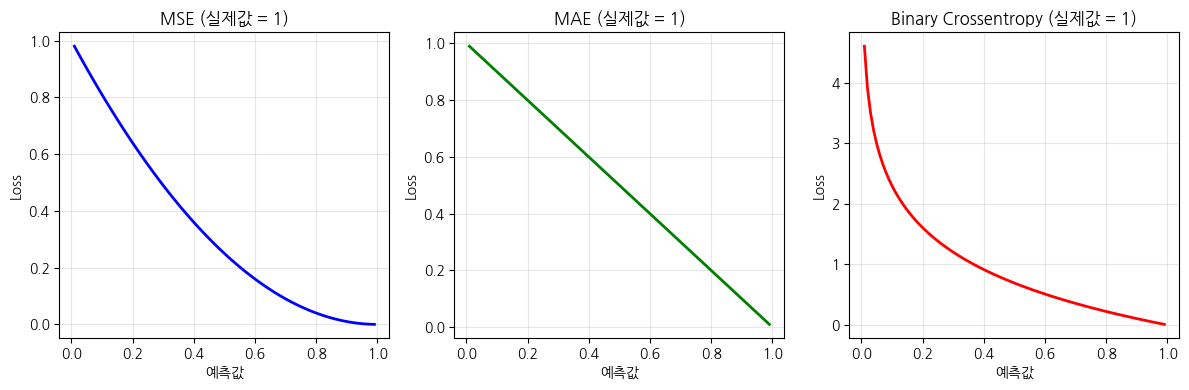

💡 관찰 포인트:
- BCE는 예측값이 0에 가까울수록 손실이 급격히 증가
- MSE는 오차에 제곱을 적용하여 큰 오차에 더 민감
- MAE는 선형적으로 증가


In [ ]:
# 실습 2-1-2: 예측값 변화에 따른 Loss 시각화

# 다양한 예측값 생성 (0.01 ~ 0.99)
pred_values = np.linspace(0.01, 0.99, 100)

# 실제 값을 1로 가정
y_true_val = 1.0

# 각 예측값에 대한 Loss 계산
mse_values = (y_true_val - pred_values) ** 2
mae_values = np.abs(y_true_val - pred_values)
bce_values = -(y_true_val * np.log(pred_values + 1e-7))

# 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(pred_values, mse_values, 'b-', linewidth=2)
plt.title('MSE (실제값 = 1)')
plt.xlabel('예측값')
plt.ylabel('Loss')
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(pred_values, mae_values, 'g-', linewidth=2)
plt.title('MAE (실제값 = 1)')
plt.xlabel('예측값')
plt.ylabel('Loss')
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(pred_values, bce_values, 'r-', linewidth=2)
plt.title('Binary Crossentropy (실제값 = 1)')
plt.xlabel('예측값')
plt.ylabel('Loss')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 관찰 포인트:")
print("- BCE는 예측값이 0에 가까울수록 손실이 급격히 증가")
print("- MSE는 오차에 제곱을 적용하여 큰 오차에 더 민감")
print("- MAE는 선형적으로 증가")

### 💻 실습 2-2: Optimizer 비교

**목표**: SGD vs Adam 최적화 과정 비교

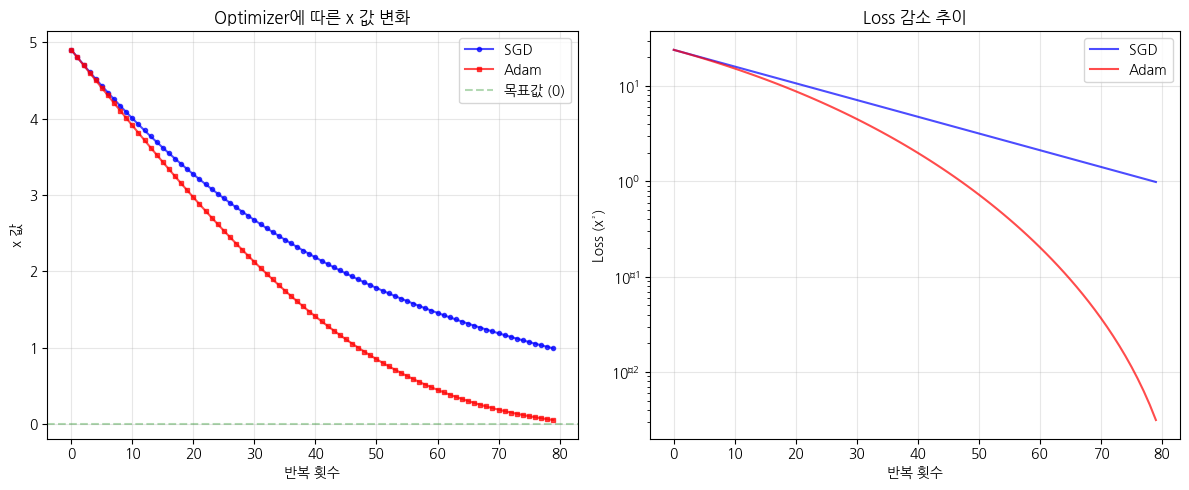

최종 x 값 - SGD: 0.993244, Adam: 0.056031
최종 Loss - SGD: 0.986534, Adam: 0.003140


In [ ]:
# 실습 2-2-1: 간단한 최적화 문제 설정

# 최적화할 변수 (초기값: 5.0)
# 목표: x²를 최소화 (정답은 x=0)
x_sgd = tf.Variable(5.0, name='x_sgd')
x_adam = tf.Variable(5.0, name='x_adam')

# Optimizer 생성
# SGD: 기본 경사하강법
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
# Adam: 적응적 학습률
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# 최적화 이력 저장
history_sgd = []
history_adam = []

# 손실 함수: f(x) = x²
def loss_fn(x):
    return x ** 2

# 50번 반복하여 최적화
for step in range(80):
    # SGD 업데이트
    with tf.GradientTape() as tape:
        loss_sgd = loss_fn(x_sgd)
    grads_sgd = tape.gradient(loss_sgd, [x_sgd])
    sgd.apply_gradients(zip(grads_sgd, [x_sgd]))
    history_sgd.append(x_sgd.numpy())

    # Adam 업데이트
    with tf.GradientTape() as tape:
        loss_adam = loss_fn(x_adam)
    grads_adam = tape.gradient(loss_adam, [x_adam])
    adam.apply_gradients(zip(grads_adam, [x_adam]))
    history_adam.append(x_adam.numpy())

# 결과 시각화
plt.figure(figsize=(12, 5))

# x 값의 변화
plt.subplot(1, 2, 1)
plt.plot(history_sgd, 'b-', marker='o', markersize=3, label='SGD', alpha=0.7)
plt.plot(history_adam, 'r-', marker='s', markersize=3, label='Adam', alpha=0.7)
plt.axhline(y=0, color='g', linestyle='--', alpha=0.3, label='목표값 (0)')
plt.xlabel('반복 횟수')
plt.ylabel('x 값')
plt.title('Optimizer에 따른 x 값 변화')
plt.legend()
plt.grid(alpha=0.3)

# Loss 값의 변화
plt.subplot(1, 2, 2)
loss_sgd_history = [val**2 for val in history_sgd]
loss_adam_history = [val**2 for val in history_adam]
plt.plot(loss_sgd_history, 'b-', label='SGD', alpha=0.7)
plt.plot(loss_adam_history, 'r-', label='Adam', alpha=0.7)
plt.xlabel('반복 횟수')
plt.ylabel('Loss (x²)')
plt.title('Loss 감소 추이')
plt.legend()
plt.grid(alpha=0.3)
plt.yscale('log')  # 로그 스케일로 보기

plt.tight_layout()
plt.show()

print(f"최종 x 값 - SGD: {x_sgd.numpy():.6f}, Adam: {x_adam.numpy():.6f}")
print(f"최종 Loss - SGD: {loss_fn(x_sgd).numpy():.6f}, Adam: {loss_fn(x_adam).numpy():.6f}")

<details>
<summary>💡 결과 분석</summary>

- **SGD**: 일정한 속도로 천천히 수렴
- **Adam**: 초반에는 빠르게, 후반에는 안정적으로 수렴
- GAN 학습에서는 Adam이 더 안정적인 결과를 보여주는 경우가 많음
</details>

### 🎯 도전 과제 2

**과제**: `from_logits=True`와 `from_logits=False`의 차이를 코드로 확인해보세요.

<details>
<summary>💡 힌트 보기</summary>

- `from_logits=True`: 활성화 함수를 거치지 않은 값 (raw output)
- `from_logits=False`: 이미 sigmoid를 거친 확률값 (0~1)
</details>

In [ ]:
# 여기에 from_logits 차이를 확인하는 코드를 작성해보세요
# (도전 과제 - 직접 작성)

---
# 3️⃣ CNN (Convolutional Neural Network) 기초 (30분)

## 📚 핵심 개념
- **Convolution**: 필터를 사용하여 이미지의 특징 추출
- **Stride**: 필터가 이동하는 간격
- **Padding**: 입력 크기를 유지하기 위한 패딩
- **Feature Map**: Convolution 연산의 출력

### 📝 문제 3-1: 객관식

**Q1. Stride=2인 Convolution 연산의 효과는?**

1. 출력 크기가 입력과 동일해진다
2. 출력 크기가 약 절반으로 줄어든다
3. 출력 크기가 2배로 늘어난다
4. 파라미터 수가 2배로 늘어난다

<details>
<summary>💡 힌트 보기</summary>

Stride는 필터가 한 번에 이동하는 칸 수입니다. Stride=2는 한 칸 건너뛰며 이동합니다.
</details>

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

Stride=2는 필터가 2칸씩 이동하므로, 출력 크기가 입력의 약 1/2로 줄어듭니다.
예: 32×32 입력 → 16×16 출력
</details>

**Q2. Padding='same'의 의미는?**

1. 입력과 출력의 크기가 같도록 패딩을 추가한다
2. 패딩을 전혀 사용하지 않는다
3. 항상 1픽셀의 패딩을 추가한다
4. 필터 크기와 같은 패딩을 추가한다

<details>
<summary>✅ 정답 확인</summary>

**정답: 1번**

`padding='same'`은 입력과 출력의 공간적 크기가 동일하도록 자동으로 패딩을 계산해 추가합니다.
</details>

### 💻 실습 3-1: Convolution 연산 직접 확인

**목표**: Convolution 필터가 어떻게 동작하는지 시각화

In [ ]:
# 실습 3-1-1: 간단한 이미지에 Convolution 적용

# 간단한 5×5 이미지 생성 (가운데가 밝은 이미지)
simple_image = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 2, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
], dtype=np.float32)

# TensorFlow Conv2D는 (batch, height, width, channels) 형태를 기대
# 형태 변환: (5, 5) → (1, 5, 5, 1)
image_tensor = tf.reshape(simple_image, [1, 5, 5, 1])

# 수직 에지 검출 필터 (Vertical Edge Detector)
# 왼쪽이 밝고 오른쪽이 어두우면 양수 값
vertical_filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
], dtype=np.float32)

# 수평 에지 검출 필터 (Horizontal Edge Detector)
horizontal_filter = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
], dtype=np.float32)

# 필터를 TensorFlow 형태로 변환: (height, width, in_channels, out_channels)
vertical_filter_tensor = tf.reshape(vertical_filter, [3, 3, 1, 1])
horizontal_filter_tensor = tf.reshape(horizontal_filter, [3, 3, 1, 1])

# Convolution 연산 수행
# padding='valid': 패딩 없음
output_vertical = tf.nn.conv2d(
    image_tensor,
    vertical_filter_tensor,
    strides=[1, 1, 1, 1],  # (batch, height, width, channels)
    padding='VALID'
)

output_horizontal = tf.nn.conv2d(
    image_tensor,
    horizontal_filter_tensor,
    strides=[1, 1, 1, 1],
    padding='VALID'
)

output_vertical

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[ 3.],
         [ 0.],
         [-3.]],

        [[ 4.],
         [ 0.],
         [-4.]],

        [[ 3.],
         [ 0.],
         [-3.]]]], dtype=float32)>

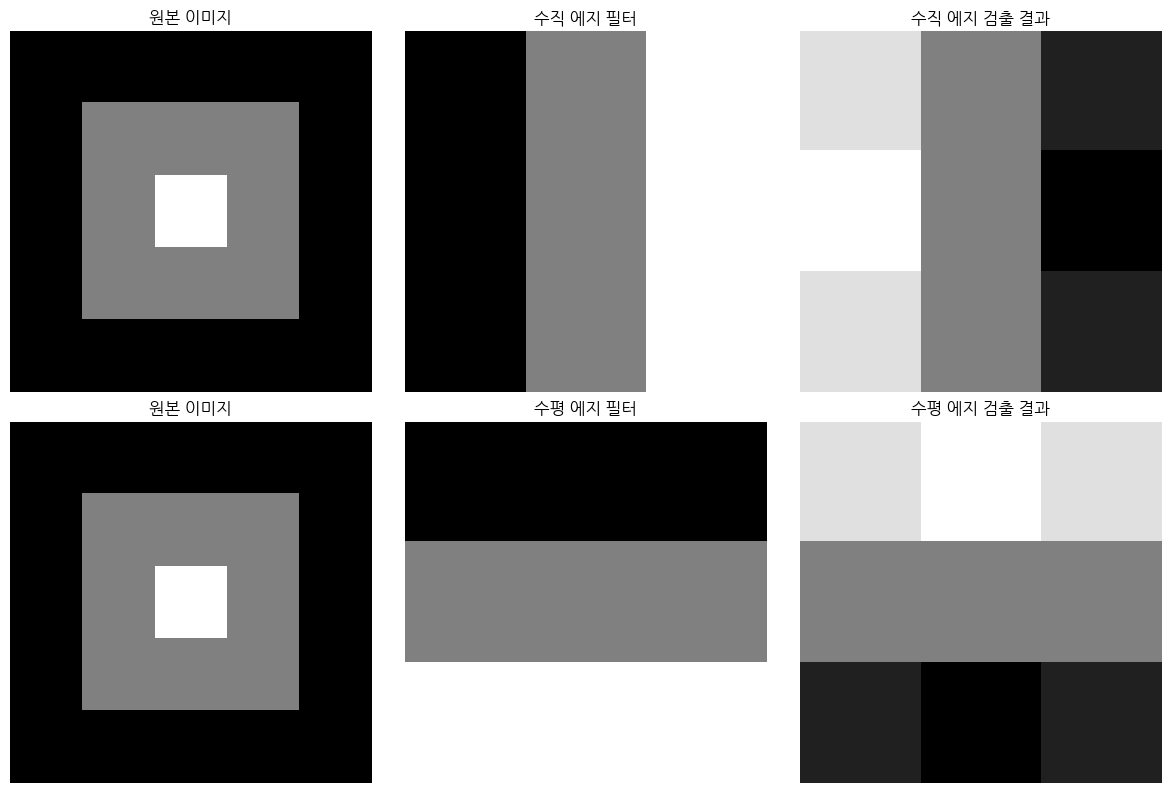

원본 이미지 크기: (5, 5)
출력 크기: (3, 3)


In [ ]:


# 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 원본 이미지
axes[0, 0].imshow(simple_image, cmap='gray')
axes[0, 0].set_title('원본 이미지')
axes[0, 0].axis('off')

# 수직 필터
axes[0, 1].imshow(vertical_filter, cmap='gray', vmin=-1, vmax=1)
axes[0, 1].set_title('수직 에지 필터')
axes[0, 1].axis('off')

# 수직 필터 결과
axes[0, 2].imshow(output_vertical[0, :, :, 0], cmap='gray')
axes[0, 2].set_title('수직 에지 검출 결과')
axes[0, 2].axis('off')

# 원본 이미지 (반복)
axes[1, 0].imshow(simple_image, cmap='gray')
axes[1, 0].set_title('원본 이미지')
axes[1, 0].axis('off')

# 수평 필터
axes[1, 1].imshow(horizontal_filter, cmap='gray', vmin=-1, vmax=1)
axes[1, 1].set_title('수평 에지 필터')
axes[1, 1].axis('off')

# 수평 필터 결과
axes[1, 2].imshow(output_horizontal[0, :, :, 0], cmap='gray')
axes[1, 2].set_title('수평 에지 검출 결과')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("원본 이미지 크기:", simple_image.shape)
print("출력 크기:", output_vertical.shape[1:3])  # (height, width)

<details>
<summary>💡 Convolution 연산 이해하기</summary>

- 필터(커널)가 이미지 위를 슬라이딩하며 내적(dot product) 수행
- 에지 검출 필터는 밝기 변화가 큰 부분을 강조
- 출력 크기 = (입력 크기 - 필터 크기 + 1) / stride
</details>

원본 이미지 크기: (5, 5)
padding='valid' 출력: (3, 3)
padding='same' 출력: (5, 5)
stride=2 출력: (2, 2)


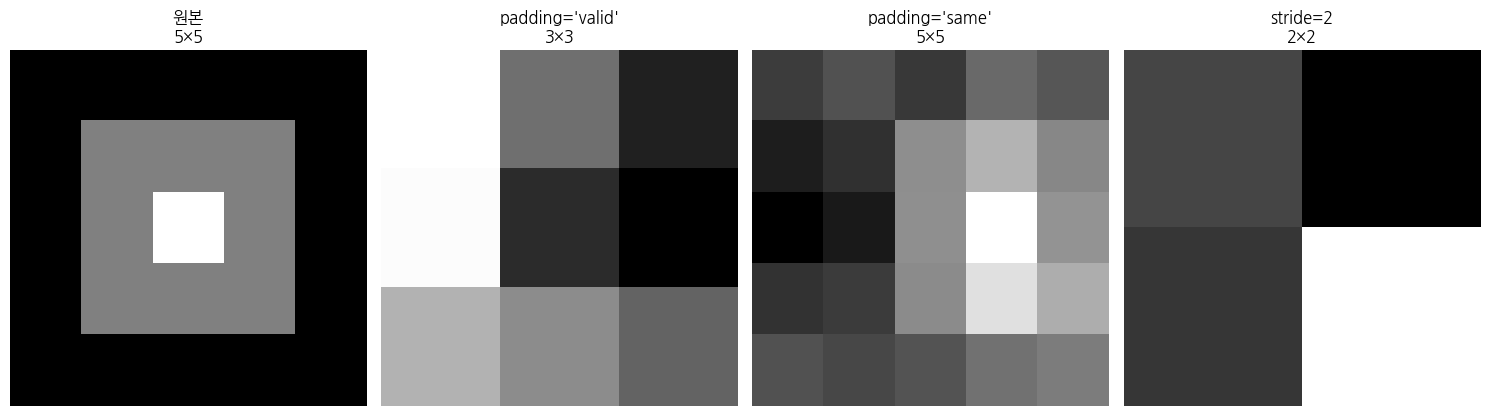

In [ ]:
# 실습 3-1-2: Stride와 Padding 효과 비교

# 동일한 이미지로 다양한 설정 테스트
# Conv2D 레이어 생성
conv_valid = tf.keras.layers.Conv2D(
    filters=1,  # 출력 채널 수
    kernel_size=3,  # 3×3 필터
    strides=1,
    padding='valid',  # 패딩 없음
    use_bias=False
)

conv_same = tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=3,
    strides=1,
    padding='same',  # 입력과 같은 크기 유지
    use_bias=False
)

conv_stride2 = tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=3,
    strides=2,  # Stride=2
    padding='valid',
    use_bias=False
)

# 출력 크기 확인
output_valid = conv_valid(image_tensor)
output_same = conv_same(image_tensor)
output_stride2 = conv_stride2(image_tensor)

print("원본 이미지 크기:", image_tensor.shape[1:3])
print("padding='valid' 출력:", output_valid.shape[1:3])
print("padding='same' 출력:", output_same.shape[1:3])
print("stride=2 출력:", output_stride2.shape[1:3])

# 크기 비교 시각화
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

axes[0].imshow(image_tensor[0, :, :, 0], cmap='gray')
axes[0].set_title(f'원본\n{image_tensor.shape[1]}×{image_tensor.shape[2]}')
axes[0].axis('off')

axes[1].imshow(output_valid[0, :, :, 0], cmap='gray')
axes[1].set_title(f"padding='valid'\n{output_valid.shape[1]}×{output_valid.shape[2]}")
axes[1].axis('off')

axes[2].imshow(output_same[0, :, :, 0], cmap='gray')
axes[2].set_title(f"padding='same'\n{output_same.shape[1]}×{output_same.shape[2]}")
axes[2].axis('off')

axes[3].imshow(output_stride2[0, :, :, 0], cmap='gray')
axes[3].set_title(f'stride=2\n{output_stride2.shape[1]}×{output_stride2.shape[2]}')
axes[3].axis('off')

plt.tight_layout()
plt.show()

### 💻 실습 3-2: 실제 이미지에 CNN 적용

**목표**: MNIST 숫자 이미지로 CNN 구축

훈련 데이터 크기: (60000, 28, 28, 1)
테스트 데이터 크기: (10000, 28, 28, 1)
레이블 범위: 0 ~ 9


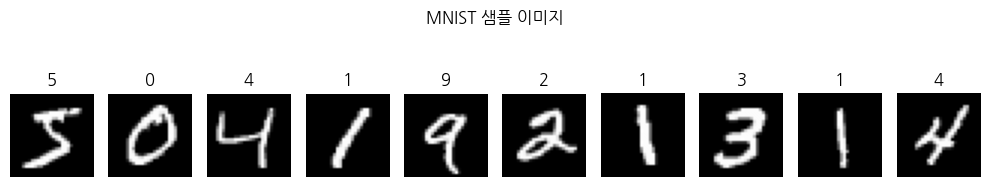

In [ ]:
# 실습 3-2-1: MNIST 데이터 로드 및 전처리

# MNIST 데이터셋 로드 (손글씨 숫자 0~9)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 정규화: 0~255 → 0~1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 채널 차원 추가: (28, 28) → (28, 28, 1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("훈련 데이터 크기:", x_train.shape)  # (60000, 28, 28, 1)
print("테스트 데이터 크기:", x_test.shape)  # (10000, 28, 28, 1)
print("레이블 범위:", y_train.min(), "~", y_train.max())

# 샘플 이미지 시각화
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i, :, :, 0], cmap='gray')
    plt.title(f'{y_train[i]}')
    plt.axis('off')
plt.suptitle('MNIST 샘플 이미지', y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
# 실습 3-2-2: 간단한 CNN 모델 구축

# CNN 모델 정의
cnn_model = tf.keras.Sequential([
    # 첫 번째 Convolution 블록
    # 28×28×1 → 26×26×32
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                          input_shape=(28, 28, 1), name='conv1'),
    # 26×26×32 → 13×13×32
    tf.keras.layers.MaxPooling2D((2, 2), name='pool1'),

    # 두 번째 Convolution 블록
    # 13×13×32 → 11×11×64
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
    # 11×11×64 → 5×5×64
    tf.keras.layers.MaxPooling2D((2, 2), name='pool2'),

    # Flatten: 2D → 1D
    # 5×5×64 = 1600 차원
    tf.keras.layers.Flatten(name='flatten'),

    # Fully Connected 층
    tf.keras.layers.Dense(64, activation='relu', name='fc1'),
    # 출력층: 10개 클래스 (0~9)
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

# 모델 컴파일
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # 정수 레이블용
    metrics=['accuracy']
)

# 모델 구조 확인
cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,986 (652.29 KB)

 Trainable params: 166,986 (652.29 KB)

 Non-trainable params: 0 (0.00 B)

<details>
<summary>💡 CNN 구조 이해하기</summary>

**Conv2D → MaxPooling 패턴 반복**
- Conv2D: 특징 추출
- MaxPooling: 공간 크기 축소 (down-sampling)
- Flatten: 2D feature map을 1D vector로 변환
- Dense: 최종 분류

이 패턴은 거의 모든 CNN에서 사용됩니다!
</details>

Epoch 1/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.5767 - loss: 1.5909 - val_accuracy: 0.8210 - val_loss: 0.5171
Epoch 2/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9033 - loss: 0.3187 - val_accuracy: 0.8920 - val_loss: 0.3411
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.9330 - loss: 0.2196 - val_accuracy: 0.9320 - val_loss: 0.2095


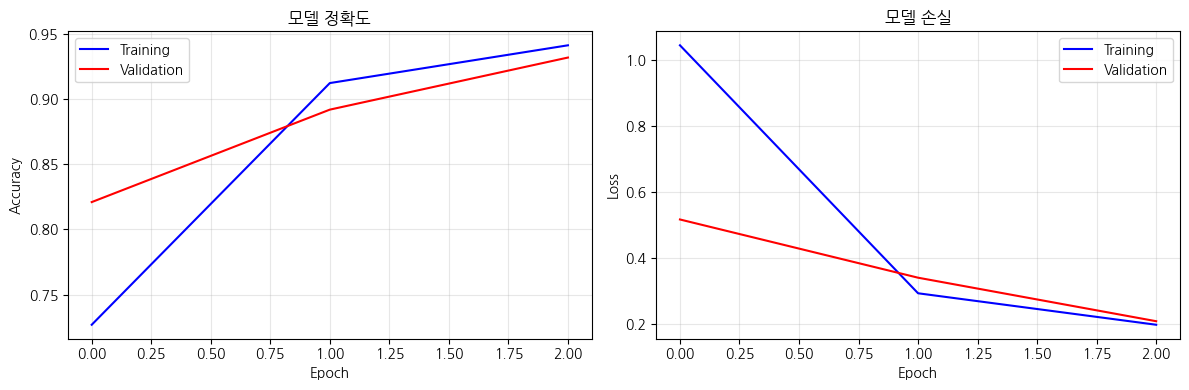

In [ ]:
# 실습 3-2-3: 모델 학습 (짧게)

# 일부 데이터만 사용하여 빠른 테스트 (전체 학습 시 시간 소요)
# 훈련: 5000개, 검증: 1000개
x_train_subset = x_train[:5000]
y_train_subset = y_train[:5000]
x_val_subset = x_test[:1000]
y_val_subset = y_test[:1000]

# 학습
history = cnn_model.fit(
    x_train_subset, y_train_subset,
    epochs=3,  # 빠른 테스트용
    batch_size=128,
    validation_data=(x_val_subset, y_val_subset),
    verbose=1
)

# 학습 곡선 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='Training')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation')
plt.title('모델 정확도')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='Training')
plt.plot(history.history['val_loss'], 'r-', label='Validation')
plt.title('모델 손실')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

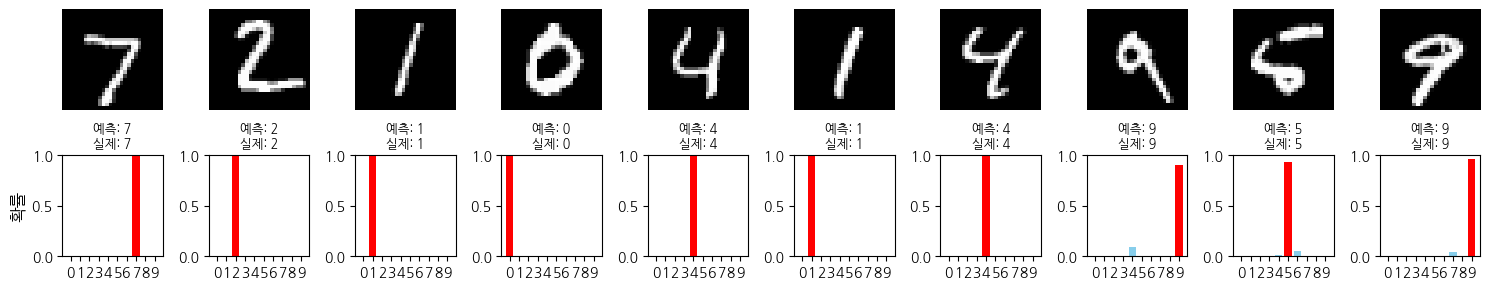


정확도: 1.0


In [ ]:
# 실습 3-2-4: 예측 결과 확인

# 테스트 이미지 10개 예측
test_images = x_test[:10]
predictions = cnn_model.predict(test_images, verbose=0)
predicted_labels = np.argmax(predictions, axis=1)

# 시각화
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.ylabel('이미지', fontsize=12)

    plt.subplot(2, 10, 10+i+1)
    plt.bar(range(10), predictions[i], color='skyblue')
    plt.bar(predicted_labels[i], predictions[i][predicted_labels[i]], color='red')
    plt.ylim(0, 1)
    plt.xticks(range(10))
    plt.title(f'예측: {predicted_labels[i]}\n실제: {y_test[i]}',
              fontsize=9)
    if i == 0:
        plt.ylabel('확률', fontsize=12)

plt.tight_layout()
plt.show()

print("\n정확도:", np.mean(predicted_labels == y_test[:10]))

### 🎯 도전 과제 3

**과제**: Dropout과 Batch Normalization을 추가한 CNN 모델을 만들어보세요.

<details>
<summary>💡 힌트 보기</summary>

```python
tf.keras.layers.Dropout(0.5)
tf.keras.layers.BatchNormalization()
```

Dropout은 Overfitting 방지, BatchNorm은 학습 안정화에 도움을 줍니다.
</details>

In [ ]:
# 여기에 개선된 CNN 모델을 작성해보세요
# (도전 과제 - 직접 작성)

---
# 4️⃣ Transposed Convolution (30분)

## 📚 핵심 개념
- **Transposed Convolution**: 업샘플링을 수행하는 연산 (반대 방향 Convolution)
- **Upsampling**: 작은 이미지를 큰 이미지로 확대
- **GAN에서의 역할**: Generator가 노이즈 벡터에서 이미지를 생성할 때 사용

### 📝 문제 4-1: 객관식

**Q1. Transposed Convolution에 대한 설명으로 옳은 것은?**

1. 일반 Convolution의 완전한 역연산이다
2. 이미지의 크기를 확대(upsampling)하는 데 사용된다
3. 파라미터가 전혀 필요 없다
4. 항상 원본 이미지를 완벽하게 복원한다

<details>
<summary>💡 힌트 보기</summary>

Transposed Convolution은 "Deconvolution"이라고도 불리지만, 엄밀히는 역연산이 아닙니다.
</details>

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

Transposed Convolution은 학습 가능한 파라미터를 사용하여 이미지를 확대(upsampling)합니다.
GAN의 Generator에서 작은 노이즈 벡터를 큰 이미지로 키울 때 핵심적으로 사용됩니다.
</details>

**Q2. GAN Generator에서 Transposed Convolution을 사용하는 이유는?**

1. 이미지를 축소하기 위해
2. 노이즈 벡터를 고해상도 이미지로 확대하기 위해
3. Discriminator의 성능을 높이기 위해
4. 학습 속도를 높이기 위해

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

Generator: 노이즈 (100차원) → 작은 feature map → Transposed Conv → 큰 이미지 (64×64)
</details>

### 💻 실습 4-1: Transposed Convolution 동작 원리

**목표**: 일반 Conv와 Transposed Conv 비교

In [ ]:
# 실습 4-1-1: 크기 변화 확인

# 작은 입력 이미지 생성 (4×4)
small_image = tf.random.normal([1, 4, 4, 3])

print("원본 크기:", small_image.shape[1:3])  # (4, 4)

# 일반 Convolution: 크기 축소
conv_down = tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=3,
    strides=2,
    padding='same'
)
output_down = conv_down(small_image)
print("Conv2D (stride=2) 후:", output_down.shape[1:3])  # (2, 2)

# Transposed Convolution: 크기 확대
conv_up = tf.keras.layers.Conv2DTranspose(
    filters=16,
    kernel_size=3,
    strides=2,
    padding='same'
)
output_up = conv_up(small_image)
print("Conv2DTranspose (stride=2) 후:", output_up.shape[1:3])  # (8, 8)

원본 크기: (4, 4)
Conv2D (stride=2) 후: (2, 2)
Conv2DTranspose (stride=2) 후: (8, 8)


<details>
<summary>💡 크기 변화 이해하기</summary>

- **Conv2D (stride=2)**: 크기가 1/2로 축소 (다운샘플링)
- **Conv2DTranspose (stride=2)**: 크기가 2배로 확대 (업샘플링)
- GAN Generator: 반복적인 Transposed Conv로 점점 큰 이미지 생성
</details>

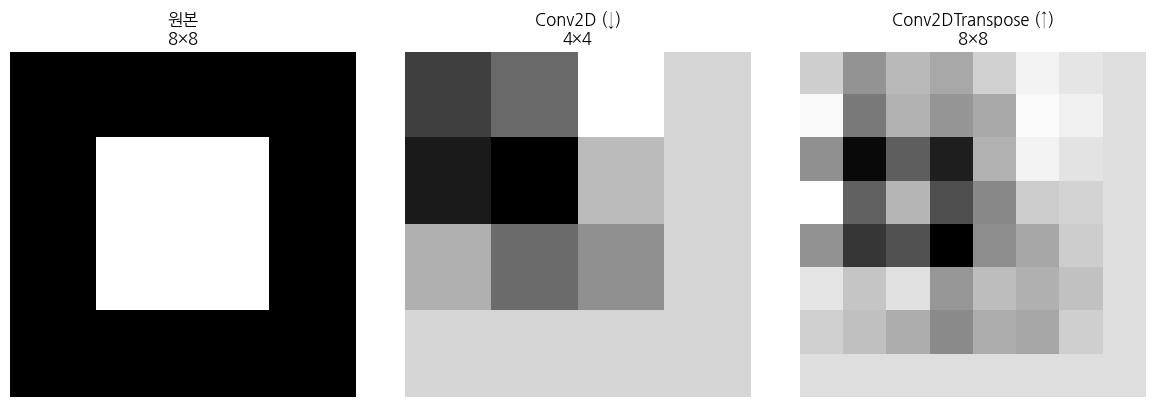

원본 → Down → Up 크기 변화:
(8, 8) → (4, 4) → (8, 8)


In [ ]:
# 실습 4-1-2: 시각적 비교

# 간단한 패턴 이미지 생성
pattern = np.zeros((8, 8))
pattern[2:6, 2:6] = 1  # 중앙에 사각형
pattern_tensor = tf.reshape(pattern.astype(np.float32), [1, 8, 8, 1])

# Down-sampling (Conv2D)
conv_down = tf.keras.layers.Conv2D(
    filters=1, kernel_size=3, strides=2, padding='same', use_bias=False
)
# 가중치를 평균 필터로 설정 (단순 다운샘플링 효과)
conv_down.build(input_shape=(1, 8, 8, 1))
down_result = conv_down(pattern_tensor)

# Up-sampling (Conv2DTranspose)
conv_up = tf.keras.layers.Conv2DTranspose(
    filters=1, kernel_size=3, strides=2, padding='same', use_bias=False
)
conv_up.build(input_shape=down_result.shape)
up_result = conv_up(down_result)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(pattern_tensor[0, :, :, 0], cmap='gray', vmin=0, vmax=1)
axes[0].set_title(f'원본\n{pattern_tensor.shape[1]}×{pattern_tensor.shape[2]}')
axes[0].axis('off')

axes[1].imshow(down_result[0, :, :, 0], cmap='gray')
axes[1].set_title(f'Conv2D (↓)\n{down_result.shape[1]}×{down_result.shape[2]}')
axes[1].axis('off')

axes[2].imshow(up_result[0, :, :, 0], cmap='gray')
axes[2].set_title(f'Conv2DTranspose (↑)\n{up_result.shape[1]}×{up_result.shape[2]}')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("원본 → Down → Up 크기 변화:")
print(f"{pattern_tensor.shape[1:3]} → {down_result.shape[1:3]} → {up_result.shape[1:3]}")

### 💻 실습 4-2: Generator 구조 이해하기

**목표**: GAN Generator의 핵심 구조 직접 구현

In [ ]:
# 실습 4-2-1: 간단한 Generator 뼈대 만들기

def build_simple_generator(latent_dim=100):
    """
    노이즈 벡터를 이미지로 변환하는 간단한 Generator

    구조:
    - 입력: (latent_dim,) 노이즈 벡터
    - Dense → Reshape → Transposed Conv 반복
    - 출력: (64, 64, 3) 이미지
    """
    model = tf.keras.Sequential([
        # 입력: 100차원 노이즈 벡터
        tf.keras.layers.Input(shape=(latent_dim,)),

        # Dense 층으로 시작점 생성
        # 100 → 8*8*256 = 16384
        tf.keras.layers.Dense(8 * 8 * 256, use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),

        # Reshape: 1D → 3D (8×8×256)
        tf.keras.layers.Reshape((8, 8, 256)),

        # 첫 번째 Transposed Conv: 8×8 → 16×16
        tf.keras.layers.Conv2DTranspose(
            filters=128,
            kernel_size=4,
            strides=2,
            padding='same',
            use_bias=False
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),

        # 두 번째 Transposed Conv: 16×16 → 32×32
        tf.keras.layers.Conv2DTranspose(
            filters=64,
            kernel_size=4,
            strides=2,
            padding='same',
            use_bias=False
        ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),

        # 세 번째 Transposed Conv: 32×32 → 64×64
        tf.keras.layers.Conv2DTranspose(
            filters=3,  # RGB 3채널
            kernel_size=4,
            strides=2,
            padding='same',
            use_bias=False,
            activation='tanh'  # GAN에서 표준: 출력 범위 [-1, 1]
        )
    ], name='simple_generator')

    return model

# Generator 생성
generator = build_simple_generator(latent_dim=100)
generator.summary()

Model: "simple_generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16384)          │     1,638,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16384)          │        65,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 16, 16, 128)    │       524,288 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 32, 32, 64)     │       131,072 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_12             │ (None, 64, 64, 3)      │         3,072 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,363,136 (9.01 MB)

 Trainable params: 2,329,984 (8.89 MB)

 Non-trainable params: 33,152 (129.50 KB)

<details>
<summary>💡 Generator 구조 이해하기</summary>

**GAN Generator의 전형적인 구조:**
1. Dense → Reshape: 1D 벡터를 3D feature map으로 변환
2. Transposed Conv 반복: 점진적으로 크기 확대
3. BatchNormalization: 학습 안정화
4. 최종 activation='tanh': 출력을 [-1, 1] 범위로 제한

**크기 변화:**
100 (noise) → 8×8×256 → 16×16×128 → 32×32×64 → 64×64×3 (image)
</details>

노이즈 크기: (4, 100)
생성된 이미지 크기: (4, 64, 64, 3)
생성된 이미지 값 범위: -0.7403739 ~ 0.87327075


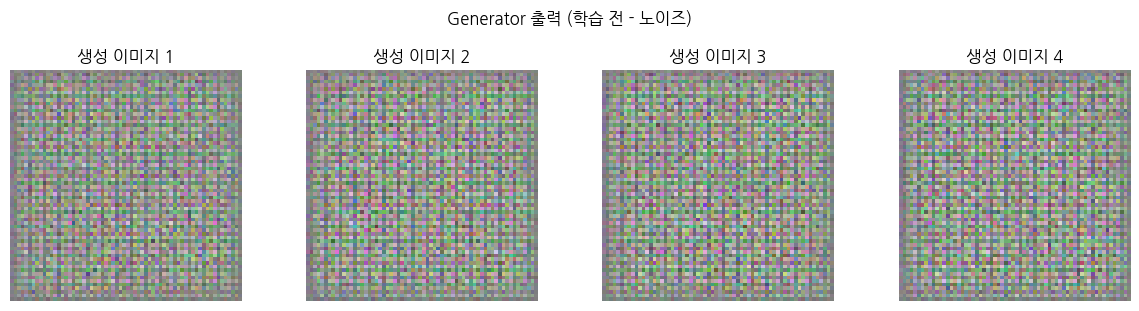


💡 현재는 학습 전이므로 의미 없는 노이즈가 출력됩니다.
   GAN 학습 후에는 실제 이미지와 유사한 결과를 생성합니다!


In [ ]:
# 실습 4-2-2: Generator로 이미지 생성해보기

# 랜덤 노이즈 생성
noise = tf.random.normal([4, 100]) * 30 # 배치 4개

# Generator로 이미지 생성
generated_images = generator(noise, training=False)

print("노이즈 크기:", noise.shape)
print("생성된 이미지 크기:", generated_images.shape)  # (4, 64, 64, 3)
print("생성된 이미지 값 범위:",
      generated_images.numpy().min(), "~", generated_images.numpy().max())

# 생성된 이미지 시각화
# tanh 출력 [-1, 1]을 [0, 1]로 변환
display_images = (generated_images + 1) / 2.0

plt.figure(figsize=(12, 3))
for i in range(4):
    plt.subplot(1, 4, i+1)
    # RGB 이미지이므로 cmap 불필요
    plt.imshow(display_images[i])
    plt.title(f'생성 이미지 {i+1}')
    plt.axis('off')
plt.suptitle('Generator 출력 (학습 전 - 노이즈)', y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 현재는 학습 전이므로 의미 없는 노이즈가 출력됩니다.")
print("   GAN 학습 후에는 실제 이미지와 유사한 결과를 생성합니다!")

### 🎯 도전 과제 4

**과제**: UpSampling2D + Conv2D 조합과 Conv2DTranspose의 차이를 비교해보세요.

<details>
<summary>💡 힌트 보기</summary>

UpSampling2D는 단순 복제(nearest) 또는 보간(bilinear)이고,
Conv2DTranspose는 학습 가능한 파라미터로 업샘플링합니다.

어느 것이 더 나을까요? (정답은 없습니다 - 상황에 따라 다름)
</details>

In [ ]:
# 여기에 두 방식을 비교하는 코드를 작성해보세요
# (도전 과제 - 직접 작성)

---
# 5️⃣ 이미지 전처리 & tf.data Pipeline (30분)

## 📚 핵심 개념
- **Normalization**: 이미지를 [-1, 1] 범위로 정규화
- **tf.data.Dataset**: 효율적인 데이터 파이프라인
- **shuffle, batch, prefetch**: 학습 성능 최적화

### 📝 문제 5-1: 객관식

**Q1. GAN에서 이미지를 [-1, 1] 범위로 정규화하는 이유는?**

1. 파일 크기를 줄이기 위해
2. Generator의 tanh 출력과 범위를 맞추기 위해
3. 학습 속도를 높이기 위해
4. 메모리를 절약하기 위해

<details>
<summary>💡 힌트 보기</summary>

Generator의 마지막 활성화 함수는 보통 tanh이고, tanh의 출력 범위는 [-1, 1]입니다.
</details>

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

- Generator 출력: tanh → [-1, 1]
- 실제 이미지도 [-1, 1]로 정규화
- 이렇게 하면 Discriminator가 동일한 범위의 입력을 받음
</details>

**Q2. tf.data.Dataset의 prefetch의 역할은?**

1. 데이터를 미리 메모리에 로드한다
2. GPU가 연산하는 동안 다음 배치를 미리 준비한다
3. 데이터를 압축한다
4. 데이터를 무작위로 섞는다

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

prefetch는 GPU 연산과 데이터 준비를 병렬로 수행하여 대기 시간을 줄입니다.
</details>

### 💻 실습 5-1: 이미지 정규화 방법

**목표**: 다양한 정규화 방법 비교

원본 이미지 범위: 0.0 ~ 255.0


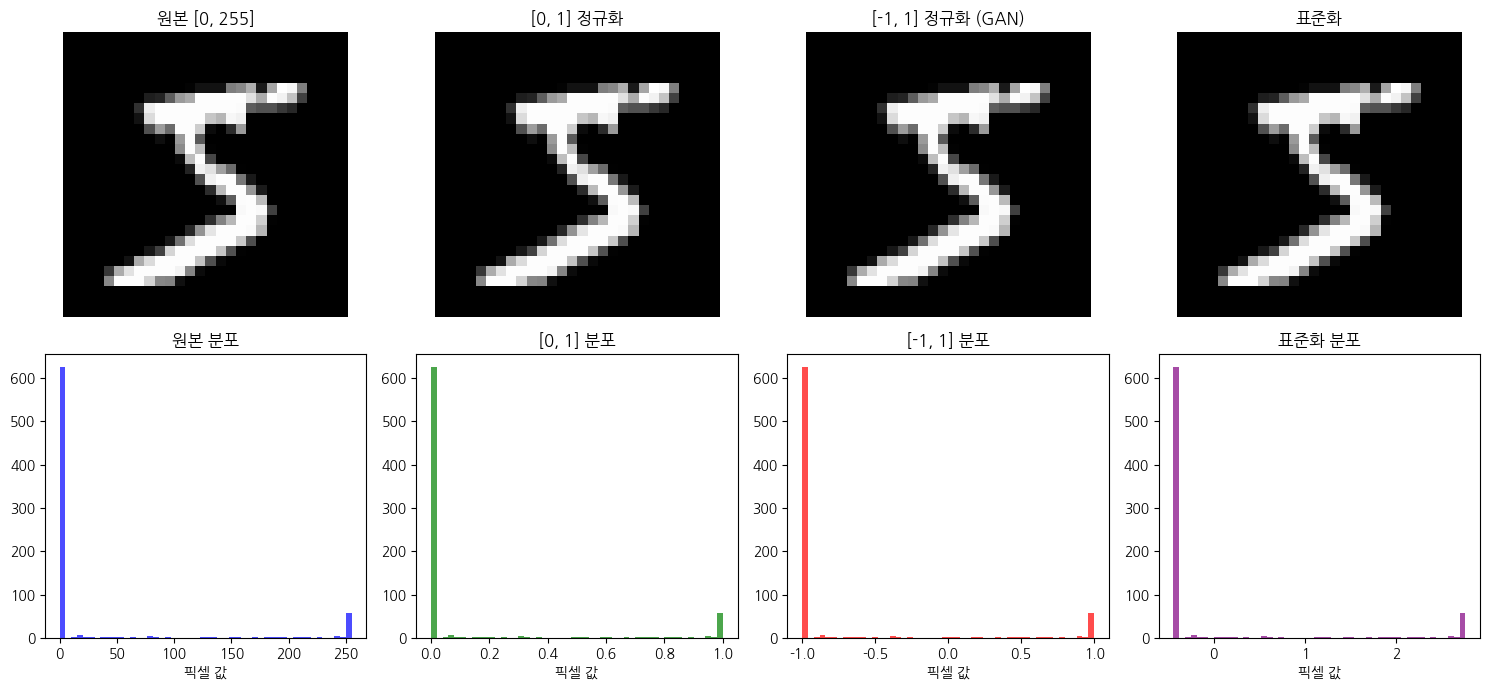


각 정규화 방법의 범위:
[0, 1]:    0.0000 ~ 1.0000
[-1, 1]:   -1.0000 ~ 1.0000
표준화:    -0.4408 ~ 2.7608


In [ ]:
# 실습 5-1-1: 정규화 방법 비교

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# MNIST 로드
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# (28,28) → (28,28,1) reshape + float 변환
x_train = x_train.astype('float32')[..., np.newaxis]

# MNIST 이미지 하나 가져오기 (0~255 범위)
sample_image = x_train[0]  # 이미 0~255 스케일 (float32)

print("원본 이미지 범위:", sample_image.min(), "~", sample_image.max())


# -------------------------------------------------------
# 정규화 방법들
# -------------------------------------------------------

# 방법 1: [0, 1] 정규화 (일반적인 방법)
normalized_01 = sample_image / 255.0

# 방법 2: [-1, 1] 정규화 (GAN에서 사용)
normalized_11 = (sample_image - 127.5) / 127.5

# 방법 3: 표준화 (평균 0, 표준편차 1) — numpy 기반
mean = np.mean(sample_image)
std = np.std(sample_image)
standardized = (sample_image - mean) / (std + 1e-7)


# -------------------------------------------------------
# 시각화
# -------------------------------------------------------

fig, axes = plt.subplots(2, 4, figsize=(15, 7))

# 원본
axes[0, 0].imshow(sample_image[:, :, 0], cmap='gray')
axes[0, 0].set_title('원본 [0, 255]')
axes[0, 0].axis('off')

# [0, 1] 정규화
axes[0, 1].imshow(normalized_01[:, :, 0], cmap='gray')
axes[0, 1].set_title('[0, 1] 정규화')
axes[0, 1].axis('off')

# [-1, 1] 정규화
axes[0, 2].imshow(normalized_11[:, :, 0], cmap='gray')
axes[0, 2].set_title('[-1, 1] 정규화 (GAN)')
axes[0, 2].axis('off')

# 표준화
axes[0, 3].imshow(standardized[:, :, 0], cmap='gray')
axes[0, 3].set_title('표준화')
axes[0, 3].axis('off')


# -------------------------------------------------------
# 히스토그램
# -------------------------------------------------------

axes[1, 0].hist(sample_image.flatten(), bins=50, color='blue', alpha=0.7)
axes[1, 0].set_title('원본 분포')
axes[1, 0].set_xlabel('픽셀 값')

axes[1, 1].hist(normalized_01.flatten(), bins=50, color='green', alpha=0.7)
axes[1, 1].set_title('[0, 1] 분포')
axes[1, 1].set_xlabel('픽셀 값')

axes[1, 2].hist(normalized_11.flatten(), bins=50, color='red', alpha=0.7)
axes[1, 2].set_title('[-1, 1] 분포')
axes[1, 2].set_xlabel('픽셀 값')

axes[1, 3].hist(standardized.flatten(), bins=50, color='purple', alpha=0.7)
axes[1, 3].set_title('표준화 분포')
axes[1, 3].set_xlabel('픽셀 값')

plt.tight_layout()
plt.show()


# -------------------------------------------------------
# 값 범위 출력
# -------------------------------------------------------

print("\n각 정규화 방법의 범위:")
print(f"[0, 1]:    {normalized_01.min():.4f} ~ {normalized_01.max():.4f}")
print(f"[-1, 1]:   {normalized_11.min():.4f} ~ {normalized_11.max():.4f}")
print(f"표준화:    {standardized.min():.4f} ~ {standardized.max():.4f}")

In [ ]:
28*28

784

<details>
<summary>💡 정규화 방법 선택 가이드</summary>

- **[0, 1] 정규화**: 일반적인 분류/회귀 문제
- **[-1, 1] 정규화**: GAN (Generator의 tanh 출력과 일치)
- **표준화**: 입력 분포가 중요한 경우 (예: ResNet)
</details>

역정규화 결과 확인:
[0, 1]에서 복원:   0.00 ~ 255.00
[-1, 1]에서 복원:  0.00 ~ 255.00
원본:              0.00 ~ 255.00


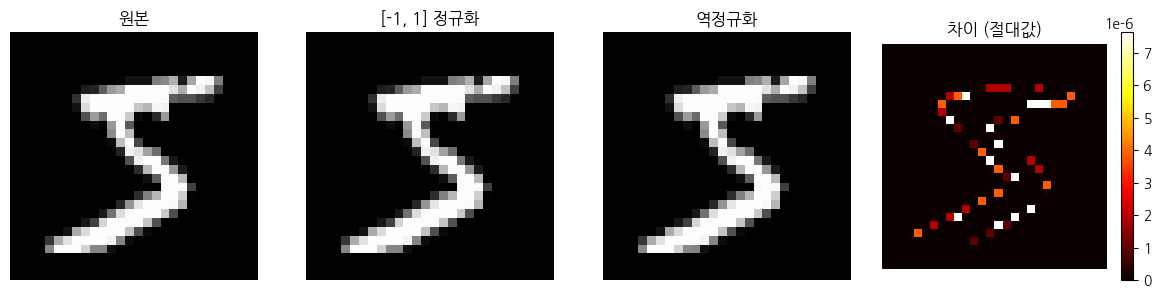

In [ ]:
# 실습 5-1-2: 역정규화 (이미지로 되돌리기)

import numpy as np  # 위에서 이미 했다면 생략 가능

def denormalize(image, method='0_1'):
    """
    정규화된 이미지를 원래 범위로 되돌리는 함수

    Args:
        image: 정규화된 이미지 (numpy 배열)
        method: '0_1' 또는 '-1_1'
    Returns:
        [0, 255] 범위의 이미지 (float32 numpy 배열)
    """
    if method == '0_1':
        # [0, 1] → [0, 255]
        restored = image * 255.0
    elif method == '-1_1':
        # [-1, 1] → [0, 255]
        restored = (image + 1.0) * 127.5
    else:
        raise ValueError("method는 '0_1' 또는 '-1_1'이어야 합니다")

    return restored

# 테스트 (앞에서 만든 normalized_01, normalized_11, sample_image 사용)
restored_01 = denormalize(normalized_01, method='0_1')
restored_11 = denormalize(normalized_11, method='-1_1')

print("역정규화 결과 확인:")
print(f"[0, 1]에서 복원:   {restored_01.min():.2f} ~ {restored_01.max():.2f}")
print(f"[-1, 1]에서 복원:  {restored_11.min():.2f} ~ {restored_11.max():.2f}")
print(f"원본:              {sample_image.min():.2f} ~ {sample_image.max():.2f}")

# 시각적 확인
plt.figure(figsize=(12, 3))

plt.subplot(1, 4, 1)
plt.imshow(sample_image[:, :, 0], cmap='gray')
plt.title('원본')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(normalized_11[:, :, 0], cmap='gray')
plt.title('[-1, 1] 정규화')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(restored_11[:, :, 0], cmap='gray')
plt.title('역정규화')
plt.axis('off')

plt.subplot(1, 4, 4)
# 차이 확인 (이론적으로는 0에 가까워야 함)
diff = np.abs(sample_image - restored_11)
plt.imshow(diff[:, :, 0], cmap='hot')
plt.title('차이 (절대값)')
plt.axis('off')
plt.colorbar()

plt.tight_layout()
plt.show()

### 💻 실습 5-2: tf.data Pipeline 구축

**목표**: 효율적인 데이터 파이프라인 만들기

In [ ]:
type(x_train), x_train.shape

(numpy.ndarray, (60000, 28, 28, 1))

In [ ]:
type(train_dataset)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [ ]:
# 실습 5-2-1: 기본 tf.data.Dataset 만들기

# MNIST 데이터를 tf.data.Dataset으로 변환
# 전처리: [-1, 1] 정규화
def preprocess(image, label):
    """이미지를 [-1, 1]로 정규화하는 함수"""
    image = tf.cast(image, tf.float32)
    image = (image - 127.5) / 127.5  # [-1, 1]
    return image, label

# Dataset 생성
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset


<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [ ]:

# 전처리 적용
train_dataset = train_dataset.map(
    preprocess,
    num_parallel_calls=tf.data.AUTOTUNE  # 병렬 처리
)

print("Dataset 생성 완료")
print("데이터 타입:", train_dataset.element_spec)

# 샘플 확인
for image, label in train_dataset.take(1):
    print("\n샘플 이미지 크기:", image.shape)
    print("샘플 레이블:", label.numpy())
    print("정규화 범위:", image.numpy().min(), "~", image.numpy().max())

Dataset 생성 완료
데이터 타입: (TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))

샘플 이미지 크기: (28, 28, 1)
샘플 레이블: 5
정규화 범위: -1.0 ~ 1.0


In [ ]:
# 실습 5-2-2: shuffle, batch, prefetch 적용

BATCH_SIZE = 128
BUFFER_SIZE = 1000  # shuffle 버퍼 크기

# 최적화된 파이프라인 구축
train_dataset_optimized = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)  # 1. 전처리
    .shuffle(BUFFER_SIZE)  # 2. 섞기
    .batch(BATCH_SIZE)  # 3. 배치 생성
    .prefetch(tf.data.AUTOTUNE)  # 4. 미리 가져오기
)

print("최적화된 Dataset 구성:")
print(f"- shuffle buffer: {BUFFER_SIZE}")
print(f"- batch size: {BATCH_SIZE}")
print(f"- prefetch: AUTOTUNE")

# 배치 확인
for images_batch, labels_batch in train_dataset_optimized.take(1):
    print(f"\n배치 크기: {images_batch.shape}")
    print(f"레이블 크기: {labels_batch.shape}")

<details>
<summary>💡 tf.data Pipeline 최적화 팁</summary>

**최적 순서:**
1. `map()`: 전처리 (num_parallel_calls=AUTOTUNE)
2. `cache()`: (선택) 메모리에 캐싱
3. `shuffle()`: 데이터 섞기
4. `batch()`: 배치 생성
5. `prefetch()`: 미리 준비 (AUTOTUNE)

이 순서를 지키면 학습 속도가 크게 향상됩니다!
</details>

성능 비교 중... (각 300 배치)

비최적화 파이프라인: 7.74초
최적화 파이프라인:   8.30초
속도 향상:            0.93배



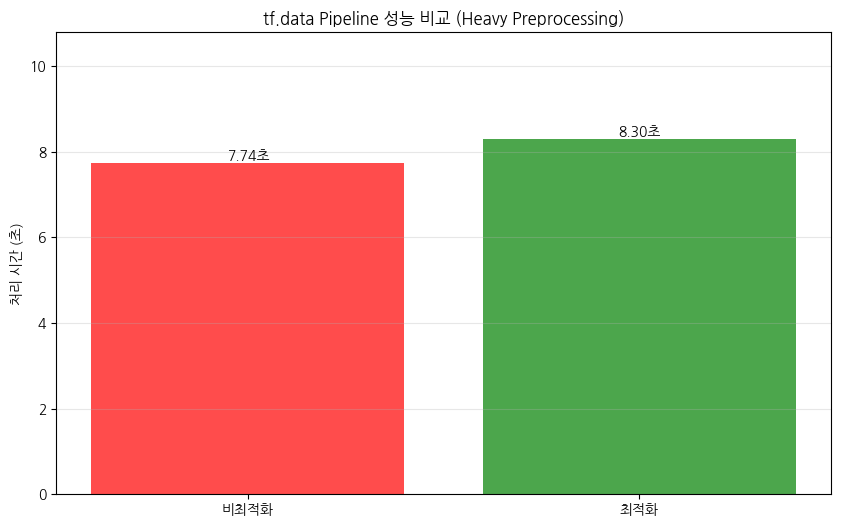

In [ ]:
# 실습 5-2-3: 파이프라인 성능 비교 (차이 확 나는 버전)

import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# MNIST 데이터 로드
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., np.newaxis].astype("float32")

# ================================
# ① 일부러 무거운 전처리 함수 정의
# ================================
def preprocess_heavy(image, label):
    # 1. 이미지 확대 → 연산량 증가
    image = tf.image.resize(image, [128, 128])

    # 2. 랜덤 뒤집기
    image = tf.image.random_flip_left_right(image)

    # 3. 랜덤 밝기 변환
    image = tf.image.random_brightness(image, max_delta=0.3)

    # 4. 정규화
    image = image / 255.0
    return image, label


# ================================
# ② 벤치마크 함수
# ================================
def benchmark(dataset, num_batches=300):
    start = time.time()
    for batch, (images, labels) in enumerate(dataset.take(num_batches)):
        pass  # 실제 학습 대신 단순 pass
    return time.time() - start


# ================================
# ③ 비최적화 파이프라인
# ================================
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset_slow = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(preprocess_heavy, num_parallel_calls=None)  # 병렬 처리 ❌
    .batch(BATCH_SIZE)
)


# ================================
# ④ 최적화 파이프라인
# ================================
dataset_fast = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(preprocess_heavy, num_parallel_calls=tf.data.AUTOTUNE)  # 병렬 처리 ⭕
    .shuffle(BUFFER_SIZE)                                        # 셔플 버퍼
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)                                  # prefetch ⭕
)


# ================================
# ⑤ 벤치마크 실행
# ================================
print("성능 비교 중... (각 300 배치)\n")
time_slow = benchmark(dataset_slow, num_batches=300)
time_fast = benchmark(dataset_fast, num_batches=300)

print(f"비최적화 파이프라인: {time_slow:.2f}초")
print(f"최적화 파이프라인:   {time_fast:.2f}초")
print(f"속도 향상:            {time_slow / time_fast:.2f}배\n")


# ================================
# ⑥ 시각화
# ================================
plt.figure(figsize=(10, 6))
bars = plt.bar(['비최적화', '최적화'], [time_slow, time_fast],
               color=['red', 'green'], alpha=0.7)
plt.ylabel('처리 시간 (초)')
plt.title('tf.data Pipeline 성능 비교 (Heavy Preprocessing)')
plt.ylim(0, max(time_slow, time_fast) * 1.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.2f}초",
             ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.show()


### 🎯 도전 과제 5

**과제**: Data Augmentation을 포함한 파이프라인을 만들어보세요.
(RandomFlip, RandomRotation 등)

<details>
<summary>💡 힌트 보기</summary>

```python
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    # 다른 augmentation 추가
    return image, label

dataset = dataset.map(augment)
```

단, GAN 학습에서는 augmentation을 신중하게 사용해야 합니다!
</details>

In [ ]:
# 여기에 Augmentation 파이프라인을 작성해보세요
# (도전 과제 - 직접 작성)

---
# 6️⃣ 확률 분포 기초 (20분)

## 📚 핵심 개념
- **Gaussian Distribution**: 정규분포, GAN의 latent space
- **Latent Vector**: Generator의 입력으로 사용되는 랜덤 벡터
- **Sampling**: 확률 분포에서 샘플 추출

### 📝 문제 6-1: 객관식

**Q1. GAN의 latent vector z가 보통 정규분포(Gaussian)에서 샘플링되는 이유는?**

1. 계산이 가장 빠르기 때문에
2. 메모리를 적게 사용하기 때문에
3. 다양한 샘플을 생성하면서도 연속적인 특성을 가지기 때문에
4. 항상 같은 결과를 보장하기 때문에

<details>
<summary>💡 힌트 보기</summary>

정규분포는 연속적이고, 중앙 영역에 많은 샘플이 있으며, 극단값도 가능합니다.
</details>

<details>
<summary>✅ 정답 확인</summary>

**정답: 3번**

- 정규분포는 연속적 → latent space에서 부드러운 보간 가능
- 다양한 값 생성 가능 → 다양한 이미지 생성
- 중심에 샘플이 많음 → 안정적인 학습
</details>

**Q2. Latent dimension (z의 크기)이 너무 작으면?**

1. 학습 속도가 느려진다
2. 다양한 이미지를 생성하기 어렵다
3. 메모리가 부족해진다
4. 항상 더 좋은 결과가 나온다

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

Latent dimension이 작으면 표현력이 제한되어 다양한 이미지를 생성하기 어렵습니다.
보통 DCGAN에서는 100차원을 사용합니다.
</details>

### 💻 실습 6-1: 정규분포 이해하기

**목표**: 정규분포의 특성 시각화

In [ ]:
# 실습 6-1-1: 정규분포 샘플링

# 다양한 파라미터로 정규분포 샘플링
samples_standard = tf.random.normal([10000], mean=0.0, stddev=1.0)
samples_shifted = tf.random.normal([10000], mean=2.0, stddev=1.0)
samples_wide = tf.random.normal([10000], mean=0.0, stddev=2.0)

# 히스토그램으로 분포 시각화
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(samples_standard.numpy(), bins=50, density=True, alpha=0.7, color='blue')
plt.title('표준 정규분포\nN(0, 1)')
plt.xlabel('값')
plt.ylabel('확률 밀도')
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(samples_shifted.numpy(), bins=50, density=True, alpha=0.7, color='green')
plt.title('평균 이동\nN(2, 1)')
plt.xlabel('값')
plt.ylabel('확률 밀도')
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(samples_wide.numpy(), bins=50, density=True, alpha=0.7, color='red')
plt.title('분산 증가\nN(0, 2)')
plt.xlabel('값')
plt.ylabel('확률 밀도')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 통계량 확인
print("표준 정규분포 - 평균:", samples_standard.numpy().mean(),
      "표준편차:", samples_standard.numpy().std())
print("이동된 분포  - 평균:", samples_shifted.numpy().mean(),
      "표준편차:", samples_shifted.numpy().std())
print("넓은 분포    - 평균:", samples_wide.numpy().mean(),
      "표준편차:", samples_wide.numpy().std())

In [ ]:
# 실습 6-1-2: Latent Space 시각화 (2D)

# 2차원 latent space 샘플링 (시각화를 위해)
latent_samples = tf.random.normal([1000, 2], mean=0.0, stddev=1.0)

# 산점도로 시각화
plt.figure(figsize=(10, 10))
plt.scatter(latent_samples[:, 0], latent_samples[:, 1],
           alpha=0.5, s=10, c='blue')
plt.title('2D Latent Space 샘플 분포', fontsize=14)
plt.xlabel('z₁')
plt.ylabel('z₂')
plt.grid(alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)

# 원으로 표준편차 범위 표시
circle1 = plt.Circle((0, 0), 1, color='red', fill=False, linestyle='--',
                     label='σ=1 (68%)')
circle2 = plt.Circle((0, 0), 2, color='orange', fill=False, linestyle='--',
                     label='σ=2 (95%)')
circle3 = plt.Circle((0, 0), 3, color='yellow', fill=False, linestyle='--',
                     label='σ=3 (99.7%)')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.gca().add_patch(circle3)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend()
plt.show()

print("💡 관찰 포인트:")
print("- 대부분의 샘플이 원점 근처에 분포")
print("- 표준편차 1 범위 내에 약 68%의 샘플")
print("- 연속적으로 분포하여 부드러운 보간 가능")

<details>
<summary>💡 Latent Space의 의미</summary>

**Latent Space (잠재 공간)**
- Generator의 입력 공간
- 이 공간의 각 점이 하나의 이미지에 대응
- 인접한 점들 → 유사한 이미지
- 부드러운 보간 가능 → 자연스러운 이미지 변환

**예시:**
z₁ = [0.5, 0.2, ...] → 웃는 얼굴
z₂ = [0.7, 0.1, ...] → 살짝 웃는 얼굴
</details>

### 💻 실습 6-2: Latent Space 보간

**목표**: Latent vector 사이를 보간하여 이미지 변화 확인

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 실습 6-2-1: Latent Space 선형 보간 (Linear Interpolation)

def interpolate_latent(z1, z2, num_steps=10):
    """
    두 잠재 벡터(z1, z2) 사이를 선형 보간합니다.
    (Vectorization을 통해 for문 없이 연산하여 효율적입니다.)

    Args:
        z1: 시작 잠재 벡터 (Shape: [1, latent_dim])
        z2: 끝 잠재 벡터 (Shape: [1, latent_dim])
        num_steps: 보간할 단계의 수

    Returns:
        interpolated: 보간된 잠재 벡터들 (Shape: [num_steps, latent_dim])
    """
    # 1. 0에서 1사이의 비율(alpha) 생성 (Shape: [num_steps, 1])
    # 예: [0.0, 0.1, ... , 1.0]
    alphas = tf.linspace(0.0, 1.0, num_steps)[:, tf.newaxis]

    # 2. 선형 보간 수식 적용: z = (1 - alpha) * z1 + alpha * z2
    # 브로드캐스팅을 통해 [num_steps, latent_dim] 형태로 한 번에 계산
    interpolated = (1 - alphas) * z1 + alphas * z2

    return interpolated

# ---------------------------------------------------------
# 1. 두 개의 랜덤 잠재 벡터(Latent Vector) 생성
# ---------------------------------------------------------
latent_dim = 100
z1 = tf.random.normal([1, latent_dim])
z2 = tf.random.normal([1, latent_dim])

# ---------------------------------------------------------
# 2. 잠재 공간 보간 (Interpolation) 수행
# ---------------------------------------------------------
num_steps = 10
interpolated_z = interpolate_latent(z1, z2, num_steps=num_steps)

print(f"시작 벡터 (z1) shape: {z1.shape}")
print(f"끝 벡터 (z2) shape: {z2.shape}")
print(f"보간된 벡터들 (interpolated_z) shape: {interpolated_z.shape}") # (10, 100)

# ---------------------------------------------------------
# 3. Generator를 통해 이미지 생성
# ---------------------------------------------------------
# generator는 이전에 학습된 모델 객체여야 합니다.
interpolated_images = generator(interpolated_z, training=False)

# ---------------------------------------------------------
# 4. 결과 시각화
# ---------------------------------------------------------
plt.figure(figsize=(20, 2))

for i in range(num_steps):
    plt.subplot(1, num_steps, i+1)

    # Tanh 출력(-1 ~ 1)을 시각화를 위해 [0, 1]로 스케일링
    img = (interpolated_images[i, :, :, :] + 1) / 2.0

    plt.imshow(img)
    plt.title(f'Step {i}\n({i/(num_steps-1):.1f})')
    plt.axis('off')

plt.suptitle('Latent Space Interpolation: z1 → z2', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

print("\n💡 Tip: 학습이 잘 된 Generator라면, 이미지가 z1에서 z2로 '부드럽게(Seamless)' 변화해야 합니다.")

In [ ]:
# 실습 6-2-1: 선형 보간(Linear Interpolation)

def interpolate_latent(z1, z2, num_steps=10):
    """
    두 latent vector 사이를 선형 보간

    Args:
        z1: 시작 latent vector
        z2: 끝 latent vector
        num_steps: 보간 단계 수
    Returns:
        보간된 latent vectors
    """
    # alpha: 0 → 1로 변화
    alphas = tf.linspace(0.0, 1.0, num_steps)

    # z = (1-alpha)*z1 + alpha*z2
    interpolated = []
    for alpha in alphas:
        z = (1 - alpha) * z1 + alpha * z2
        interpolated.append(z)

    return tf.stack(interpolated)

# 두 개의 랜덤 latent vector 생성
z1 = tf.random.normal([1, 100])
z2 = tf.random.normal([1, 100])

# 10단계로 보간
interpolated_z = interpolate_latent(z1, z2, num_steps=10)

print("시작 벡터 (z1):", z1.shape)
print("끝 벡터 (z2):", z2.shape)
print("보간된 벡터들:", interpolated_z.shape)  # (10, 1, 100)

# Generator로 이미지 생성 (이전에 만든 generator 사용)
interpolated_z_reshaped = tf.reshape(interpolated_z, [-1, 100])  # (10, 100)
interpolated_images = generator(interpolated_z_reshaped, training=False)

# 시각화
plt.figure(figsize=(20, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    # tanh 출력을 [0, 1]로 변환
    img = (interpolated_images[i] + 1) / 2.0
    plt.imshow(img)
    plt.title(f'{i/9:.1f}')
    plt.axis('off')
plt.suptitle('Latent Space 보간: z₁ → z₂', y=1.05)
plt.tight_layout()
plt.show()

print("\n💡 학습된 Generator에서는 이미지가 부드럽게 변화합니다!")

In [ ]:
# 실습 6-2-2: 2D Latent Space에서 그리드 샘플링

# 2D latent space에서 그리드 생성
n = 10  # 10×10 그리드
# -2 ~ 2 범위에서 균등하게 샘플링
z1_values = np.linspace(-2, 2, n)
z2_values = np.linspace(-2, 2, n)

# 그리드 포인트 생성
grid_z = []
for z2_val in z2_values:
    for z1_val in z1_values:
        # 나머지 차원은 0으로 (시각화를 위해 2D만 사용)
        z = np.zeros(100)
        z[0] = z1_val
        z[1] = z2_val
        grid_z.append(z)

grid_z = tf.constant(grid_z, dtype=tf.float32)
print("그리드 latent vectors:", grid_z.shape)  # (100, 100)

# 그리드 포인트 시각화
plt.figure(figsize=(8, 8))
plt.scatter(grid_z[:, 0], grid_z[:, 1], s=50, c='blue', alpha=0.6)
plt.title('2D Latent Space 그리드 샘플링', fontsize=14)
plt.xlabel('z₁')
plt.ylabel('z₂')
plt.grid(alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

print("💡 실제 GAN에서는 이 그리드의 각 점이 서로 다른 이미지를 생성합니다.")

### 🎯 도전 과제 6

**과제**: Uniform Distribution과 Gaussian Distribution에서 샘플링한 latent vector로
생성한 이미지 품질을 비교해보세요.

<details>
<summary>💡 힌트 보기</summary>

```python
z_gaussian = tf.random.normal([batch_size, latent_dim])
z_uniform = tf.random.uniform([batch_size, latent_dim], -1, 1)
```

어느 것이 더 나은 결과를 만들까요?
</details>

In [ ]:
# 여기에 두 분포를 비교하는 코드를 작성해보세요
# (도전 과제 - 직접 작성)

---
# 7️⃣ Activation Functions (20분)

## 📚 핵심 개념
- **ReLU / LeakyReLU**: Discriminator에서 주로 사용
- **Tanh**: Generator 출력에서 사용
- **Sigmoid**: Discriminator 마지막 층에서 사용

### 📝 문제 7-1: 객관식

**Q1. GAN Discriminator에서 LeakyReLU를 ReLU 대신 사용하는 이유는?**

1. 계산 속도가 더 빠르기 때문에
2. Dying ReLU 문제를 완화하기 위해
3. 메모리를 절약하기 위해
4. 항상 더 높은 정확도를 보장하기 위해

<details>
<summary>💡 힌트 보기</summary>

ReLU는 음수 입력을 완전히 0으로 만들지만, LeakyReLU는 작은 값으로 유지합니다.
</details>

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

- ReLU: f(x) = max(0, x) → 음수는 완전히 0
- LeakyReLU: f(x) = max(0.2x, x) → 음수는 작은 기울기 유지
- Dying ReLU: 일부 뉴런이 완전히 죽어서 학습되지 않는 문제
- LeakyReLU는 이를 완화하여 더 안정적인 학습 가능
</details>

**Q2. Generator 출력에 tanh를 사용하는 이유는?**

1. 가장 빠른 활성화 함수이기 때문에
2. [-1, 1] 범위의 출력이 이미지 정규화와 일치하기 때문에
3. 양수만 출력하기 위해
4. 그래디언트 소실이 없기 때문에

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

- 실제 이미지: [-1, 1]로 정규화
- Generator 출력: tanh → [-1, 1]
- 범위가 일치하여 Discriminator가 동일한 범위의 입력을 받음
</details>

### 💻 실습 7-1: Activation Function 비교

**목표**: 다양한 활성화 함수의 동작 비교

In [ ]:
# 실습 7-1-1: 활성화 함수 시각화

# 입력 범위: -5 ~ 5
x = np.linspace(-5, 5, 200)
x_tensor = tf.constant(x, dtype=tf.float32)
x_tensor


<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([-5.        , -4.9497485 , -4.8994975 , -4.849246  , -4.798995  ,
       -4.7487435 , -4.6984925 , -4.648241  , -4.59799   , -4.5477386 ,
       -4.4974875 , -4.447236  , -4.396985  , -4.3467336 , -4.2964826 ,
       -4.246231  , -4.19598   , -4.1457286 , -4.0954776 , -4.045226  ,
       -3.9949749 , -3.9447236 , -3.8944724 , -3.844221  , -3.7939699 ,
       -3.7437186 , -3.6934674 , -3.6432161 , -3.592965  , -3.5427136 ,
       -3.4924624 , -3.4422112 , -3.39196   , -3.3417087 , -3.2914572 ,
       -3.241206  , -3.1909547 , -3.1407034 , -3.0904522 , -3.040201  ,
       -2.9899497 , -2.9396985 , -2.8894472 , -2.839196  , -2.7889447 ,
       -2.7386935 , -2.6884422 , -2.638191  , -2.5879397 , -2.5376885 ,
       -2.4874372 , -2.437186  , -2.3869348 , -2.3366835 , -2.2864323 ,
       -2.236181  , -2.1859295 , -2.1356783 , -2.085427  , -2.0351758 ,
       -1.9849247 , -1.9346733 , -1.8844221 , -1.8341708 , -1.7839196 ,
       -1.733668

In [ ]:
# 다양한 활성화 함수 계산
relu_output = tf.nn.relu(x_tensor)
leaky_relu_output = tf.nn.leaky_relu(x_tensor, alpha=0.2)
tanh_output = tf.nn.tanh(x_tensor)
sigmoid_output = tf.nn.sigmoid(x_tensor)


In [ ]:
leaky_relu_output

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([-1.        , -0.9899497 , -0.9798995 , -0.9698492 , -0.959799  ,
       -0.9497487 , -0.9396985 , -0.9296482 , -0.91959804, -0.90954775,
       -0.8994975 , -0.8894472 , -0.87939703, -0.86934674, -0.8592965 ,
       -0.8492462 , -0.839196  , -0.8291457 , -0.81909555, -0.80904526,
       -0.79899496, -0.7889447 , -0.7788945 , -0.76884425, -0.758794  ,
       -0.7487437 , -0.7386935 , -0.72864324, -0.718593  , -0.70854276,
       -0.69849247, -0.68844223, -0.678392  , -0.66834176, -0.65829146,
       -0.6482412 , -0.6381909 , -0.6281407 , -0.61809045, -0.6080402 ,
       -0.59799   , -0.5879397 , -0.57788944, -0.5678392 , -0.55778897,
       -0.54773873, -0.53768843, -0.5276382 , -0.51758796, -0.5075377 ,
       -0.49748746, -0.48743722, -0.47738695, -0.4673367 , -0.45728645,
       -0.4472362 , -0.4371859 , -0.42713568, -0.4170854 , -0.40703517,
       -0.39698493, -0.38693467, -0.37688443, -0.36683416, -0.35678393,
       -0.346733

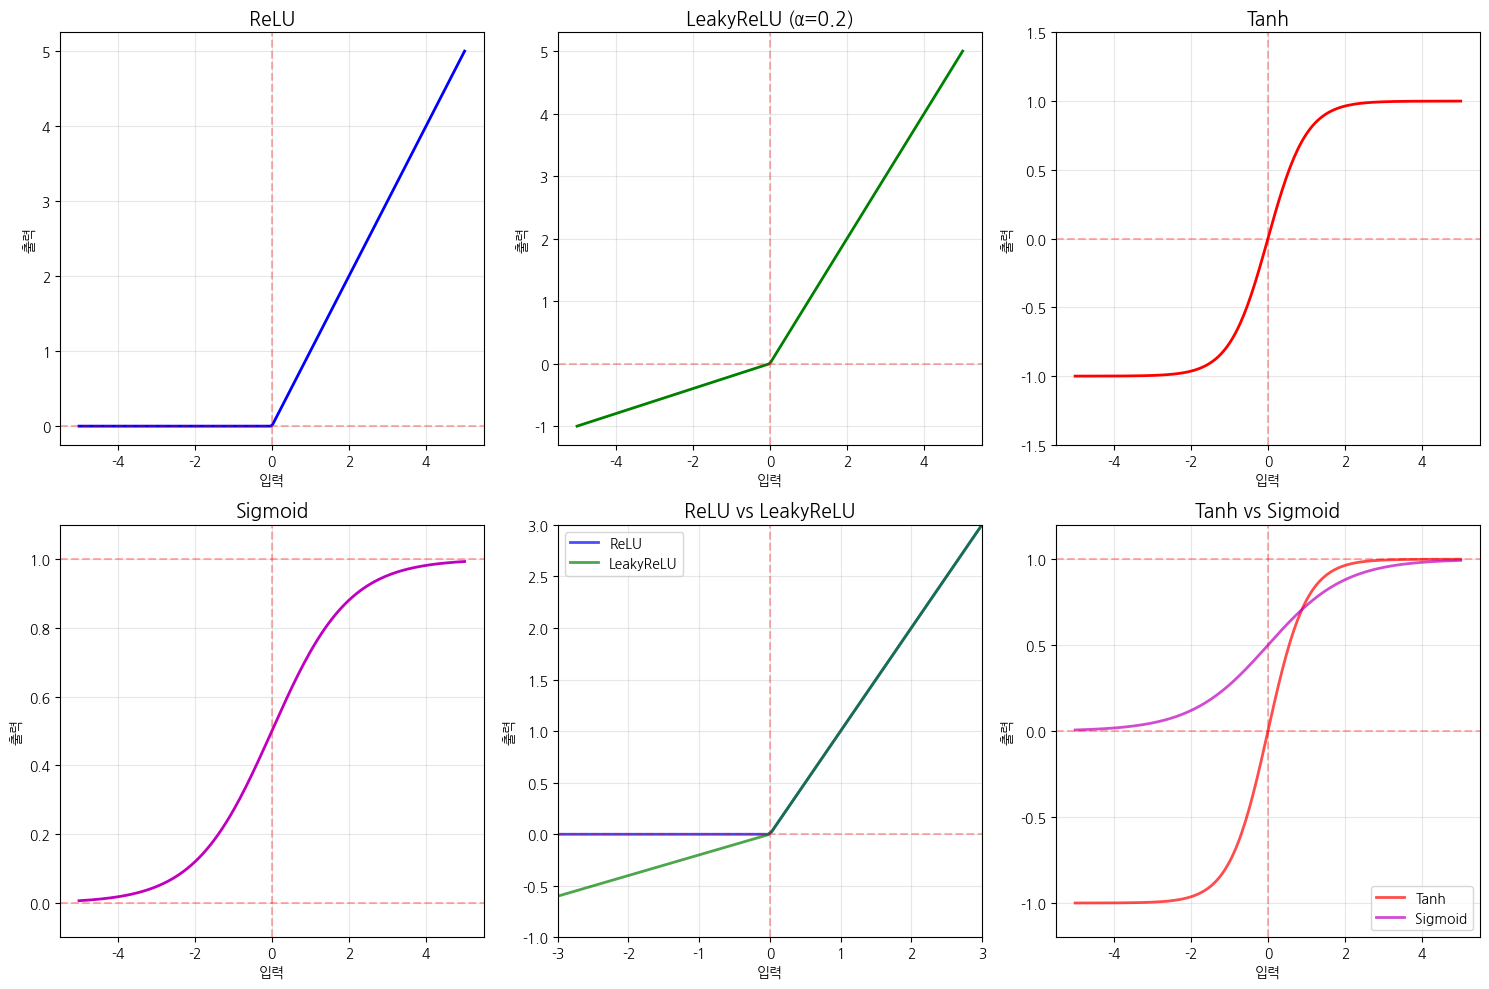

활성화 함수 특성 비교:

입력 x = -1.0일 때:
  ReLU:        0.0000
  LeakyReLU:   -0.2000
  Tanh:        -0.7616
  Sigmoid:     0.2689

입력 x = 2.0일 때:
  ReLU:        2.0000
  LeakyReLU:   2.0000
  Tanh:        0.9640
  Sigmoid:     0.8808


In [ ]:

# 시각화
plt.figure(figsize=(15, 10))

# ReLU
plt.subplot(2, 3, 1)
plt.plot(x, relu_output.numpy(), 'b-', linewidth=2)
plt.title('ReLU', fontsize=14, fontweight='bold')
plt.xlabel('입력')
plt.ylabel('출력')
plt.grid(alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)

# LeakyReLU
plt.subplot(2, 3, 2)
plt.plot(x, leaky_relu_output.numpy(), 'g-', linewidth=2)
plt.title('LeakyReLU (α=0.2)', fontsize=14, fontweight='bold')
plt.xlabel('입력')
plt.ylabel('출력')
plt.grid(alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)

# Tanh
plt.subplot(2, 3, 3)
plt.plot(x, tanh_output.numpy(), 'r-', linewidth=2)
plt.title('Tanh', fontsize=14, fontweight='bold')
plt.xlabel('입력')
plt.ylabel('출력')
plt.grid(alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.ylim(-1.5, 1.5)

# Sigmoid
plt.subplot(2, 3, 4)
plt.plot(x, sigmoid_output.numpy(), 'm-', linewidth=2)
plt.title('Sigmoid', fontsize=14, fontweight='bold')
plt.xlabel('입력')
plt.ylabel('출력')
plt.grid(alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.ylim(-0.1, 1.1)

# 비교 (ReLU vs LeakyReLU)
plt.subplot(2, 3, 5)
plt.plot(x, relu_output.numpy(), 'b-', linewidth=2, label='ReLU', alpha=0.7)
plt.plot(x, leaky_relu_output.numpy(), 'g-', linewidth=2, label='LeakyReLU', alpha=0.7)
plt.title('ReLU vs LeakyReLU', fontsize=14, fontweight='bold')
plt.xlabel('입력')
plt.ylabel('출력')
plt.legend()
plt.grid(alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.xlim(-3, 3)
plt.ylim(-1, 3)

# 비교 (Tanh vs Sigmoid)
plt.subplot(2, 3, 6)
plt.plot(x, tanh_output.numpy(), 'r-', linewidth=2, label='Tanh', alpha=0.7)
plt.plot(x, sigmoid_output.numpy(), 'm-', linewidth=2, label='Sigmoid', alpha=0.7)
plt.title('Tanh vs Sigmoid', fontsize=14, fontweight='bold')
plt.xlabel('입력')
plt.ylabel('출력')
plt.legend()
plt.grid(alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.ylim(-1.2, 1.2)

plt.tight_layout()
plt.show()

# 특성 비교
print("활성화 함수 특성 비교:")
print("\n입력 x = -1.0일 때:")
print(f"  ReLU:        {tf.nn.relu(-1.0).numpy():.4f}")
print(f"  LeakyReLU:   {tf.nn.leaky_relu(-1.0, alpha=0.2).numpy():.4f}")
print(f"  Tanh:        {tf.nn.tanh(-1.0).numpy():.4f}")
print(f"  Sigmoid:     {tf.nn.sigmoid(-1.0).numpy():.4f}")

print("\n입력 x = 2.0일 때:")
print(f"  ReLU:        {tf.nn.relu(2.0).numpy():.4f}")
print(f"  LeakyReLU:   {tf.nn.leaky_relu(2.0, alpha=0.2).numpy():.4f}")
print(f"  Tanh:        {tf.nn.tanh(2.0).numpy():.4f}")
print(f"  Sigmoid:     {tf.nn.sigmoid(2.0).numpy():.4f}")

<details>
<summary>💡 활성화 함수 선택 가이드</summary>

**GAN에서의 표준 사용:**

**Discriminator:**
- 은닉층: LeakyReLU (α=0.2)
- 출력층: Sigmoid (또는 Linear with from_logits=True)

**Generator:**
- 은닉층: ReLU 또는 LeakyReLU
- 출력층: Tanh

**이유:**
- LeakyReLU: Dying ReLU 방지, 안정적인 그래디언트
- Tanh: [-1, 1] 범위로 정규화된 이미지와 일치
</details>

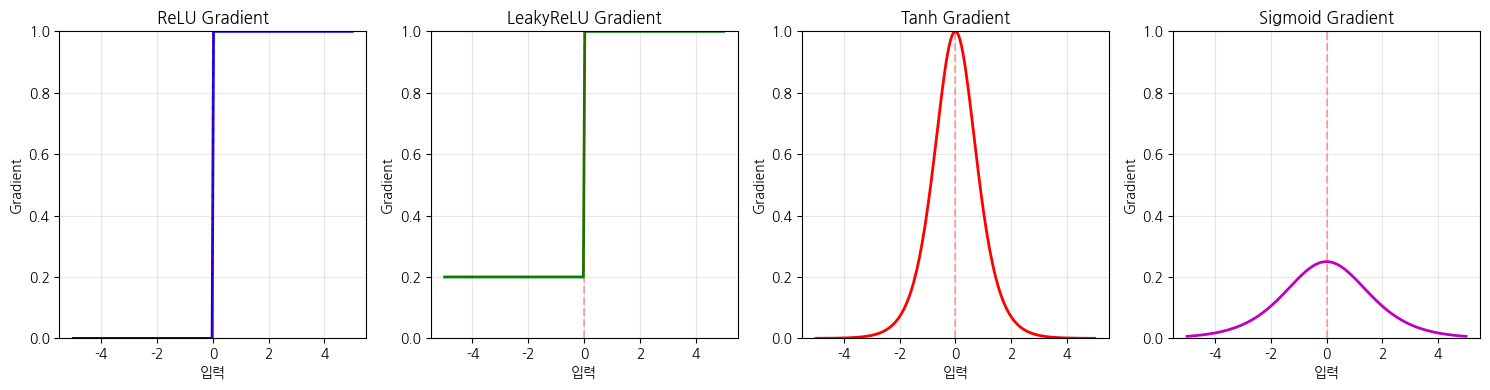

💡 관찰 포인트:
- ReLU: x>0에서 gradient=1, x<0에서 gradient=0 (Dying ReLU 위험)
- LeakyReLU: x<0에서도 작은 gradient 유지 (gradient=0.2)
- Tanh/Sigmoid: 극단값에서 gradient 소실 (Vanishing Gradient)


In [ ]:
# 실습 7-1-2: Gradient 비교

# 입력 변수 생성
x_var = tf.Variable(x_tensor)

# 각 활성화 함수에 대한 그래디언트 계산
def compute_gradient(activation_fn, x):
    with tf.GradientTape() as tape:
        y = activation_fn(x)
        # 임의의 손실 함수 (단순 합)
        loss = tf.reduce_sum(y)
    return tape.gradient(loss, x)

grad_relu = compute_gradient(tf.nn.relu, x_var)
grad_leaky = compute_gradient(lambda x: tf.nn.leaky_relu(x, alpha=0.2), x_var)
grad_tanh = compute_gradient(tf.nn.tanh, x_var)
grad_sigmoid = compute_gradient(tf.nn.sigmoid, x_var)

# ================================
# 그래디언트 시각화 (y축 0~1 고정)
# ================================
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.plot(x, grad_relu.numpy(), 'b-', linewidth=2)
plt.title('ReLU Gradient')
plt.xlabel('입력')
plt.ylabel('Gradient')
plt.grid(alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.ylim(0, 1)

plt.subplot(1, 4, 2)
plt.plot(x, grad_leaky.numpy(), 'g-', linewidth=2)
plt.title('LeakyReLU Gradient')
plt.xlabel('입력')
plt.ylabel('Gradient')
plt.grid(alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.ylim(0, 1)

plt.subplot(1, 4, 3)
plt.plot(x, grad_tanh.numpy(), 'r-', linewidth=2)
plt.title('Tanh Gradient')
plt.xlabel('입력')
plt.ylabel('Gradient')
plt.grid(alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.ylim(0, 1)

plt.subplot(1, 4, 4)
plt.plot(x, grad_sigmoid.numpy(), 'm-', linewidth=2)
plt.title('Sigmoid Gradient')
plt.xlabel('입력')
plt.ylabel('Gradient')
plt.grid(alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

print("💡 관찰 포인트:")
print("- ReLU: x>0에서 gradient=1, x<0에서 gradient=0 (Dying ReLU 위험)")
print("- LeakyReLU: x<0에서도 작은 gradient 유지 (gradient=0.2)")
print("- Tanh/Sigmoid: 극단값에서 gradient 소실 (Vanishing Gradient)")


### 🎯 도전 과제 7

**과제**: Swish (x * sigmoid(x)) 활성화 함수를 구현하고 ReLU와 비교해보세요.

<details>
<summary>💡 힌트 보기</summary>

Swish는 최근 Google에서 제안한 활성화 함수로, 일부 작업에서 ReLU보다 좋은 성능을 보입니다.

```python
def swish(x):
    return x * tf.nn.sigmoid(x)
```
</details>

In [ ]:
# 여기에 Swish 활성화 함수를 구현하고 비교해보세요
# (도전 과제 - 직접 작성)

---
# 8️⃣ Custom Training Loop & GradientTape (40분)

## 📚 핵심 개념
- **GradientTape**: 자동 미분을 위한 컨텍스트 관리자
- **Custom Training Loop**: model.fit() 없이 직접 학습 루프 작성
- **Multiple Models**: Generator와 Discriminator를 동시에 학습

### 📝 문제 8-1: 객관식

**Q1. GradientTape의 역할은?**

1. 텐서 연산의 그래디언트를 자동으로 계산한다
2. 모델을 자동으로 학습시킨다
3. 데이터를 자동으로 전처리한다
4. 모델을 자동으로 저장한다

<details>
<summary>✅ 정답 확인</summary>

**정답: 1번**

GradientTape는 기록된 연산에 대한 그래디언트를 자동으로 계산합니다.
</details>

**Q2. GAN 학습에서 model.fit()을 잘 사용하지 않는 이유는?**

1. model.fit()이 너무 느리기 때문에
2. Generator와 Discriminator를 번갈아 학습해야 하기 때문에
3. GAN은 TensorFlow를 지원하지 않기 때문에
4. 메모리가 부족하기 때문에

<details>
<summary>✅ 정답 확인</summary>

**정답: 2번**

GAN은 두 모델을 번갈아가며 학습하는 특수한 구조이므로 Custom Training Loop가 필요합니다.
</details>

### 💻 실습 8-1: GradientTape 기초

**목표**: GradientTape의 기본 사용법 익히기

In [ ]:
# 실습 8-1-1: 간단한 그래디언트 계산

# 변수 생성
x = tf.Variable(3.0)

# GradientTape로 그래디언트 계산
# f(x) = x² + 2x + 1
# f'(x) = 2x + 2
with tf.GradientTape() as tape:
    # 연산 기록
    y = x**2 + 2*x + 1

# 그래디언트 계산: dy/dx
grad = tape.gradient(y, x)

print(f"x = {x.numpy()}")
print(f"f(x) = x² + 2x + 1 = {y.numpy()}")
print(f"f'(x) = 2x + 2 = {grad.numpy()}")
print(f"이론값: 2*{x.numpy()} + 2 = {2*x.numpy() + 2}")

In [ ]:
# 실습 8-1-2: 여러 변수에 대한 그래디언트

# 두 개의 변수
w = tf.Variable(2.0)
b = tf.Variable(1.0)

# 입력 데이터
x_data = tf.constant([1.0, 2.0, 3.0])
y_true = tf.constant([3.0, 5.0, 7.0])  # y = 2x + 1

# GradientTape로 손실 및 그래디언트 계산
with tf.GradientTape() as tape:
    # 예측: y_pred = wx + b
    y_pred = w * x_data + b

    # 손실: MSE
    loss = tf.reduce_mean((y_true - y_pred)**2)

# 그래디언트 계산: dL/dw, dL/db
gradients = tape.gradient(loss, [w, b])
grad_w, grad_b = gradients

print("현재 파라미터:")
print(f"  w = {w.numpy():.4f}, b = {b.numpy():.4f}")
print(f"\n손실: {loss.numpy():.4f}")
print(f"\n그래디언트:")
print(f"  dL/dw = {grad_w.numpy():.4f}")
print(f"  dL/db = {grad_b.numpy():.4f}")

<details>
<summary>💡 GradientTape 사용 패턴</summary>

**기본 패턴:**
```python
with tf.GradientTape() as tape:
    # 1. Forward pass (순전파)
    predictions = model(inputs)
    # 2. Loss 계산
    loss = loss_fn(targets, predictions)

# 3. Backward pass (역전파)
gradients = tape.gradient(loss, model.trainable_variables)
# 4. 가중치 업데이트
optimizer.apply_gradients(zip(gradients, model.trainable_variables))
```
</details>

In [ ]:
# 실습 8-1-3: Optimizer로 파라미터 업데이트

# 초기 파라미터
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# Optimizer 생성
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# 학습 데이터
x_data = tf.constant([1.0, 2.0, 3.0, 4.0])
y_true = tf.constant([3.0, 5.0, 7.0, 9.0])  # y = 2x + 1

# 학습 이력
history_w = []
history_b = []
history_loss = []

# 20번 반복 학습
for step in range(20):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = w * x_data + b
        # Loss 계산
        loss = tf.reduce_mean((y_true - y_pred)**2)

    # Gradient 계산
    gradients = tape.gradient(loss, [w, b])

    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w, b]))

    # 이력 저장
    history_w.append(w.numpy())
    history_b.append(b.numpy())
    history_loss.append(loss.numpy())

    if step % 5 == 0:
        print(f"Step {step:2d}: w={w.numpy():.4f}, b={b.numpy():.4f}, loss={loss.numpy():.4f}")

# 결과 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# w 변화
axes[0].plot(history_w, 'b-', marker='o', markersize=4)
axes[0].axhline(y=2.0, color='r', linestyle='--', label='목표값 (2.0)')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('w')
axes[0].set_title('가중치 w의 변화')
axes[0].legend()
axes[0].grid(alpha=0.3)

# b 변화
axes[1].plot(history_b, 'g-', marker='o', markersize=4)
axes[1].axhline(y=1.0, color='r', linestyle='--', label='목표값 (1.0)')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('b')
axes[1].set_title('편향 b의 변화')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Loss 변화
axes[2].plot(history_loss, 'r-', marker='o', markersize=4)
axes[2].set_xlabel('Step')
axes[2].set_ylabel('Loss')
axes[2].set_title('손실의 변화')
axes[2].set_yscale('log')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n최종 결과: y = {w.numpy():.4f}x + {b.numpy():.4f}")
print(f"목표:      y = 2.0000x + 1.0000")

### 💻 실습 8-2: 신경망 학습 루프

**목표**: 실제 신경망으로 Custom Training Loop 작성

In [ ]:
# 실습 8-2-1: 간단한 분류 모델 학습

# 간단한 이진 분류 데이터셋 생성
np.random.seed(42)
n_samples = 1000

# 클래스 0: 원점 근처
X_class0 = np.random.randn(n_samples//2, 2) * 0.5
y_class0 = np.zeros((n_samples//2, 1))

# 클래스 1: (2, 2) 근처
X_class1 = np.random.randn(n_samples//2, 2) * 0.5 + np.array([2, 2])
y_class1 = np.ones((n_samples//2, 1))

# 데이터 합치기
X = np.vstack([X_class0, X_class1]).astype(np.float32)
y = np.vstack([y_class0, y_class1]).astype(np.float32)

# 시각화
plt.figure(figsize=(8, 8))
plt.scatter(X_class0[:, 0], X_class0[:, 1], c='blue', alpha=0.5, label='클래스 0')
plt.scatter(X_class1[:, 0], X_class1[:, 1], c='red', alpha=0.5, label='클래스 1')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('이진 분류 데이터셋')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# 실습 8-2-2: 모델과 학습 루프 구성

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. 모델 정의 (input_shape 경고 제거)
# -----------------------------
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,), name="input"),
    tf.keras.layers.Dense(8, activation='relu', name="hidden1"),
    tf.keras.layers.Dense(4, activation='relu', name="hidden2"),
    tf.keras.layers.Dense(1, activation='sigmoid', name="output")
])

model.summary()

# -----------------------------
# 2. Optimizer 및 Loss 함수
# -----------------------------
# 🔻 학습률 낮춰서 수렴 속도 완만하게
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.BinaryCrossentropy()

# -----------------------------
# 3. 데이터셋 생성 (X, y는 기존 셀에서 정의되어 있다고 가정)
# -----------------------------
dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.shuffle(1000).batch(32)

# 학습 이력
train_loss_history = []
train_acc_history = []

# Custom Training Loop
EPOCHS = 50

print("학습 시작...")
for epoch in range(EPOCHS):
    epoch_loss = []
    epoch_acc = []

    for X_batch, y_batch in dataset:
        # y를 float32로 통일 (안전용)
        y_batch = tf.cast(y_batch, tf.float32)

        with tf.GradientTape() as tape:
            # Forward pass
            predictions = model(X_batch, training=True)
            # Loss 계산
            loss = loss_fn(y_batch, predictions)

        # Backward pass
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # 정확도 계산 (numpy 변환)
        y_pred_binary = (predictions > 0.5).numpy().astype(int)
        accuracy = np.mean(y_pred_binary == y_batch.numpy())

        epoch_loss.append(loss.numpy())
        epoch_acc.append(accuracy)

    # 에폭 평균
    avg_loss = np.mean(epoch_loss)
    avg_acc = np.mean(epoch_acc)

    train_loss_history.append(avg_loss)
    train_acc_history.append(avg_acc)

    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {avg_loss:.4f}, Acc: {avg_acc:.4f}")

print("학습 완료!")

# -----------------------------
# 4. 학습 곡선 시각화
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(train_loss_history, 'b-', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('학습 손실 변화')
axes[0].grid(alpha=0.3)

axes[1].plot(train_acc_history, 'g-', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('학습 정확도 변화')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# 실습 8-2-3: 결정 경계 시각화

# 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 그리드 포인트에 대한 예측
grid_points = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
Z = model.predict(grid_points, verbose=0)
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu', alpha=0.6)
plt.colorbar(label='예측 확률')
plt.scatter(X_class0[:, 0], X_class0[:, 1], c='blue',
           edgecolor='black', s=50, alpha=0.7, label='클래스 0')
plt.scatter(X_class1[:, 0], X_class1[:, 1], c='red',
           edgecolor='black', s=50, alpha=0.7, label='클래스 1')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('학습된 모델의 결정 경계')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 💻 실습 8-3: GAN 스타일 학습 루프

**목표**: Generator와 Discriminator를 번갈아 학습하는 패턴

In [ ]:
# 실습 8-3-1: 간단한 GAN 학습 루프 구조

# 매우 간단한 Generator와 Discriminator
def build_mini_generator(latent_dim=10):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=(latent_dim,)),
        tf.keras.layers.Dense(2, activation='tanh')  # 2D 포인트 생성
    ], name='mini_generator')

def build_mini_discriminator():
    return tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')  # 진짜/가짜 판별
    ], name='mini_discriminator')

# 모델 생성
latent_dim = 10
generator = build_mini_generator(latent_dim)
discriminator = build_mini_discriminator()

# Optimizer (GAN에서는 보통 beta1=0.5 사용)
g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5)
d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5)

# Loss 함수
bce_loss = tf.keras.losses.BinaryCrossentropy()

print("Mini GAN 구조:")
print("\nGenerator:")
generator.summary()
print("\nDiscriminator:")
discriminator.summary()

In [ ]:
# 실습 8-3-2: GAN 학습 루프 구현

# 실제 데이터: 클래스 1 데이터 사용 (이전 예제에서)
real_data = X_class1.astype(np.float32)

# 학습 설정
BATCH_SIZE = 64
EPOCHS = 100
latent_dim = 10

# 학습 이력
d_loss_history = []
g_loss_history = []

print("GAN 학습 시작...")
for epoch in range(EPOCHS):
    # 실제 데이터에서 배치 샘플링
    idx = np.random.randint(0, len(real_data), BATCH_SIZE)
    real_batch = real_data[idx]

    # === Discriminator 학습 ===
    # 1. 노이즈 생성
    noise = tf.random.normal([BATCH_SIZE, latent_dim])

    # 2. 가짜 데이터 생성
    fake_batch = generator(noise, training=False)  # Generator는 고정

    # 3. Discriminator 학습
    with tf.GradientTape() as tape:
        # 진짜 데이터 판별
        real_output = discriminator(real_batch, training=True)
        # 가짜 데이터 판별
        fake_output = discriminator(fake_batch, training=True)

        # Loss 계산
        # 진짜는 1로, 가짜는 0으로 판별하도록 학습
        real_loss = bce_loss(tf.ones_like(real_output), real_output)
        fake_loss = bce_loss(tf.zeros_like(fake_output), fake_output)
        d_loss = real_loss + fake_loss

    # Discriminator 업데이트
    d_gradients = tape.gradient(d_loss, discriminator.trainable_variables)
    d_optimizer.apply_gradients(zip(d_gradients, discriminator.trainable_variables))

    # === Generator 학습 ===
    # 1. 새로운 노이즈 생성
    noise = tf.random.normal([BATCH_SIZE, latent_dim])

    # 2. Generator 학습
    with tf.GradientTape() as tape:
        # 가짜 데이터 생성
        fake_batch = generator(noise, training=True)
        # Discriminator가 판별
        fake_output = discriminator(fake_batch, training=False)  # Discriminator는 고정

        # Generator Loss 계산
        # Generator는 Discriminator가 1(진짜)로 판별하도록 유도
        g_loss = bce_loss(tf.ones_like(fake_output), fake_output)

    # Generator 업데이트
    g_gradients = tape.gradient(g_loss, generator.trainable_variables)
    g_optimizer.apply_gradients(zip(g_gradients, generator.trainable_variables))

    # 이력 저장
    d_loss_history.append(d_loss.numpy())
    g_loss_history.append(g_loss.numpy())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS} - D Loss: {d_loss.numpy():.4f}, G Loss: {g_loss.numpy():.4f}")

print("GAN 학습 완료!")

# Loss 변화 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(d_loss_history, 'b-', alpha=0.7, label='Discriminator')
plt.plot(g_loss_history, 'r-', alpha=0.7, label='Generator')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN 학습 손실 변화')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
# 최근 50개 에폭만 확대
recent = 50
plt.plot(d_loss_history[-recent:], 'b-', alpha=0.7, label='Discriminator')
plt.plot(g_loss_history[-recent:], 'r-', alpha=0.7, label='Generator')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'최근 {recent} Epoch')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 실습 8-3-3: 생성된 데이터 시각화

# 노이즈로 데이터 생성
noise = tf.random.normal([500, latent_dim])
generated_points = generator(noise, training=False).numpy()

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(real_data[:, 0], real_data[:, 1],
           c='blue', alpha=0.5, s=30, label='실제 데이터')
plt.scatter(generated_points[:, 0], generated_points[:, 1],
           c='red', alpha=0.5, s=30, label='생성된 데이터')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('GAN 학습 결과: 실제 vs 생성 데이터')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("💡 Generator가 실제 데이터의 분포를 학습했습니다!")

<details>
<summary>💡 GAN 학습 루프 핵심 패턴</summary>

**매 반복마다:**

1. **Discriminator 학습**
   - 진짜 데이터 → label 1
   - 가짜 데이터 (Generator 생성) → label 0
   - Generator는 고정 (training=False)

2. **Generator 학습**
   - 가짜 데이터 생성
   - Discriminator가 1(진짜)로 판별하도록 유도
   - Discriminator는 고정 (training=False)

**핵심:**
- 두 모델을 번갈아가며 학습
- 각자의 GradientTape 사용
- 서로를 속이려는 경쟁 관계 (Adversarial)
</details>

### 🎯 도전 과제 8

**과제**:
1. Learning rate scheduling을 적용해보세요
2. Gradient clipping을 구현해보세요
3. EarlyStopping을 직접 구현해보세요

<details>
<summary>💡 힌트 보기</summary>

```python
# Learning rate decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)

# Gradient clipping
gradients, _ = tf.clip_by_global_norm(gradients, clip_norm=1.0)

# Early Stopping
if val_loss < best_loss:
    best_loss = val_loss
    patience_counter = 0
else:
    patience_counter += 1
    if patience_counter > patience:
        break
```
</details>

In [ ]:
# 여기에 도전 과제를 작성해보세요
# (도전 과제 - 직접 작성)

---
# 🎉 복습 완료!

## 📊 최종 체크리스트

아래 항목을 모두 이해했는지 확인해보세요:

### ✅ 1. 신경망 기본 개념
- [ ] Perceptron의 동작 원리
- [ ] Forward/Backward Propagation
- [ ] Overfitting vs Underfitting
- [ ] TensorFlow 모델 구축

### ✅ 2. Loss & Optimizer
- [ ] Binary Crossentropy의 의미
- [ ] MSE, MAE, BCE 차이
- [ ] Adam Optimizer의 특징
- [ ] GAN에서 BCE를 사용하는 이유

### ✅ 3. CNN
- [ ] Convolution 연산 원리
- [ ] Stride와 Padding
- [ ] Feature Map 개념
- [ ] MaxPooling vs Stride Conv

### ✅ 4. Transposed Convolution
- [ ] Upsampling 개념
- [ ] GAN Generator에서의 역할
- [ ] 크기 계산 방법

### ✅ 5. 이미지 전처리
- [ ] [-1, 1] 정규화의 이유
- [ ] tf.data Pipeline 구축
- [ ] shuffle, batch, prefetch

### ✅ 6. 확률 분포
- [ ] Gaussian Distribution
- [ ] Latent Vector 개념
- [ ] Latent Space 보간

### ✅ 7. Activation Functions
- [ ] ReLU vs LeakyReLU
- [ ] Tanh의 출력 범위
- [ ] GAN에서의 활성화 함수 선택

### ✅ 8. Custom Training Loop
- [ ] GradientTape 사용법
- [ ] 여러 모델 동시 학습
- [ ] GAN 학습 패턴

---

## 🚀 다음 단계: GAN 학습

이제 GAN을 배울 준비가 완료되었습니다!

**학습할 내용:**
1. Vanilla GAN
2. DCGAN (Deep Convolutional GAN)
3. Conditional GAN
4. CycleGAN

화이팅! 💪

## 📝 추가 참고 자료

- TensorFlow 공식 문서: https://www.tensorflow.org/
- Keras 가이드: https://keras.io/guides/
- GAN Papers:
  - Original GAN: https://arxiv.org/abs/1406.2661
  - DCGAN: https://arxiv.org/abs/1511.06434
  - CycleGAN: https://arxiv.org/abs/1703.10593